In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

## Link Dataset
https://www.kaggle.com/datasets/pradeepjangirml007/laptop-data-set

In [3]:
df = pd.read_csv("laptop.csv")
df

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,4403,ASUS,ASUS Zenbook UX430UN-GV022T Laptop (14 Inch | ...,84990,Intel Core i5 (8th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,"Geforce MX150 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 9 Hrs Battery Life
3972,4404,ASUS,ASUS Vivobook K15 OLED K513EA-L301WS Laptop (1...,40031,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LED,15.6,UHD,Intel,256 GB SSD Storage,No HDD,65,Upto 3 Hrs Battery Life
3973,4405,ASUS,ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Lapt...,75990,AMD Octa-Core Ryzen 7,AMD,Not Expandable,16 GB,DDR4 RAM,3.1 Ghz Processor,LED,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,1024 GB SSD Storage,No HDD,120,Upto 3 Hrs Battery Life
3974,4407,ASUS,ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AM...,71909,AMD Quad-Core Ryzen 5,AMD,32 GB Expandable,8 GB,DDR4 RAM,2.1 Ghz Processor,LED,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,150W Adapter


In [4]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [5]:
df.shape

(3976, 18)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

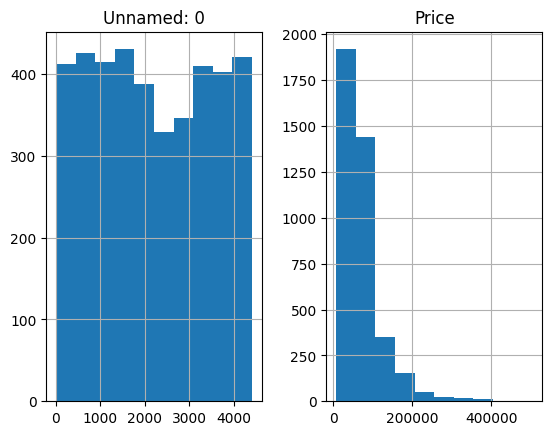

In [6]:
df.hist()

In [7]:
df.describe(include='all')

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
count,3976.000000,3976,3976,3976.000000,3976,3976,3976,3976,3976,3976,3976,3976,3968,3972,3976,3976,3976,3558
unique,NaN,31,3941,NaN,125,19,10,20,19,31,2,34,300,11,19,8,68,191
top,NaN,ASUS,Lenovo ThinkBook 16 G6 (21KHA0J6IN) Laptop (16...,NaN,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
freq,NaN,989,2,NaN,316,3009,2157,1608,1505,331,2034,2205,651,1939,1931,3014,1458,803
mean,2181.495724,NaN,NaN,72432.528672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1297.029657,NaN,NaN,52207.650948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,7990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1058.750000,NaN,NaN,39873.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2098.500000,NaN,NaN,58990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3342.250000,NaN,NaN,84990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()

Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

### Verificare intrari duplicate dupa nume

In [9]:
df.loc[df.duplicated(subset=['Name'])]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
1989,2102,HP,HP 15-fd0011TU (7P703PA) Laptop (15.6 Inch | C...,53490,3.4 Ghz Processor,3.4,16 GB Expandable,8 GB,DDR4 RAM,0,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
2066,2195,MSI,MSI Katana GF66 12UC-632IN Laptop (15.6 Inch |...,84990,Intel Core i7 (12th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.7 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,240,240W Adapter
2105,2242,ASUS,ASUS VivoBook 15 X1500EA-EJ322WS Laptop (15.6 ...,33800,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,512 GB SSD Storage,No HDD,65,Upto 6 Hrs Battery Life
2108,2249,ASUS,ASUS VivoBook 15 X1502ZA-EJ541WS Laptop (15.6 ...,53990,Intel Core i5 (12th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,2.5 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
2146,2295,Lenovo,Lenovo Ideapad Gaming 3 15IHU6 (82K101EEIN) La...,64500,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 4.5 Hrs Battery Life
2184,2347,Dell,Dell Inspiron 14 7420 (D560779WIN9S) Laptop (1...,103990,Intel Core i7 (12th Gen),Intel,Not Expandable,16 GB,DDR5 RAM,3.4 Ghz Processor,LCD,14,"GeForce MX550 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 7 Hrs Battery Life
2255,2442,HP,HP Pavilion Aero 13-be2046AU (7S449PA) Laptop ...,85500,AMD Octa-Core Ryzen 7,AMD,16 GB Expandable,16 GB,DDR5 RAM,4.7 Ghz Processor,LCD,13.3,Radeon,AMD,1024 GB SSD Storage,No HDD,65,65W Adapter
2256,2445,ASUS,ASUS TUF Gaming A15 FA506IHRZ-HN113W Laptop (1...,63250,AMD Hexa-Core Ryzen 5,AMD,32 GB Expandable,16 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,Upto 8 Hrs Battery Life
2257,2448,HP,HP Pavilion 14-dv1029TU (5D0C2PA) Laptop (14 I...,102200,Intel Core i7 (11th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,2.7 Ghz Processor,LCD,14,Iris Xe,Intel,1024 GB SSD Storage,No HDD,65,65W Adapter
2292,2492,Samsung,Samsung Galaxy Book Pro Intel Evo NP940XFG-KC5...,99999,Intel Core i7 (13th Gen),Intel,Not Expandable,16 GB RAM,RAM,2.2 Ghz Processor,LED,14,Iris Xe,Intel,1024 GB SSD Storage,No HDD,63,Upto 16 Hrs Battery Life


In [10]:
name_list = df['Name'].unique().tolist()
for name in name_list:
    print(name)

HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (11.6 Inch | MediaTek Octa Core | 4 GB | Google Chrome |)::585119::computer::laptops
Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15.6 Inch | AMD Hexa Core Ryzen 5 | 8 GB | Windows 11 | 512 GB SSD)::594497::computer::laptops
Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch | Core i5 12th Gen | 16 GB | Windows 11 | 512 GB SSD)::595299::computer::laptops
HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | Core i5 12th Gen | 8 GB | Windows 11 | 512 GB SSD)::616095::computer::laptops
Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch | Core i3 11th Gen | 8 GB | Windows 11 | 512 GB SSD)::615700::computer::laptops
Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 Inch | Core i5 11th Gen | 16 GB | Windows 11 | 512 GB SSD)::616145::computer::laptops
HP 14s-fq1092AU (50M60PA) Laptop (14 Inch | AMD Hexa Core Ryzen 5 | 8 GB | Windows 11 | 512 GB SSD)::594309::computer::laptops
Acer One 14 Z8-415 (UN.599SI.018) Laptop (14 Inch | Core i5 11th Gen | 8 GB | Windows 11 | 512 GB

### Analizare un laptop duplicat

Din analiza reiese faptul ca inregistrarile reprezinta un laptop cu aceleasi specificatii, singura diferenta fiind pretul.

In [11]:
df[df['Name'].str.contains('Dell Inspiron 15 (D560721WIN9BD)', regex=False)]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
691,729,Dell,Dell Inspiron 15 (D560721WIN9BD) Laptop (15.6 ...,42990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,256 GB SSD Storage,1024 GB HDD Storage,65,Upto 6 Hrs Battery Life
3905,4333,Dell,Dell Inspiron 15 (D560721WIN9BD) Laptop (15.6 ...,56990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,256 GB SSD Storage,1024 GB HDD Storage,65,Upto 6 Hrs Battery Life


### Stergere elemente duplicate din dataset

Elementele care au datele din coloanele specificate la fel vor fi sterse. Va ramane doar prima inregistrare din dataset.

In [12]:
df = df.loc[~df.duplicated(subset=['Name', 'Processor_Name', 'Processor_Brand', 'RAM', 'RAM_TYPE', 'SSD', 'HDD'])].reset_index(drop=True).copy()
df.shape

(3941, 18)

### Convertire pret din rupii in lei.
La data de 24.03.2025 1 rupie este 0.054 lei.

In [13]:
rata_schimb = 0.054

df['Price'] = df['Price'] * rata_schimb

### Curatare coloana RAM

Eliminare **GB** din valoarea coloanei.

In [14]:
df['RAM'] = df.RAM.str.split(" ").apply(lambda x: x[0])
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [15]:
df.Ghz.unique()

array([' 2.0 Ghz Processor', ' 4.0 Ghz Processor', ' 3.3 Ghz Processor',
       ' 4.2 Ghz Processor', ' 1.7 Ghz Processor', '0',
       ' 2.5 Ghz Processor', ' 2.2 Ghz Processor', ' 2.9 Ghz Processor',
       ' 3.4 Ghz Processor', ' 2.6 Ghz Processor', ' 3.0 Ghz Processor',
       ' 4.7 Ghz Processor', ' 3.1 Ghz Processor', ' 2.7 Ghz Processor',
       ' 2.8 Ghz Processor', ' 2.4 Ghz Processor', ' 2.1 Ghz Processor',
       ' 4.8 Ghz Processor', ' 1.2 Ghz Processor', ' 1.0 Ghz Processor',
       ' 1.8 Ghz Processor', ' 1.1 Ghz Processor', ' 2.3 Ghz Processor',
       ' 1.6 Ghz Processor', ' 0.8 Ghz Processor', ' 1.3 Ghz Processor',
       ' 1.5 Ghz Processor', ' 1.9 Ghz Processor', ' 5.5 Ghz Processor',
       ' 1.4 Ghz Processor'], dtype=object)

In [16]:
df.GPU.unique()

array(['Integrated Graphics', 'Radeon', 'GeForce RTX 3050 GPU, 4 GB',
       'Iris Xe', 'UHD', 'UHD 620', 'GeForce RTX 2050 GPU, 4 GB',
       'GeForce RTX 4050 GPU, 6 GB', 'Arc', 'GeForce GTX 1650 GPU, 4 GB',
       'UHD 605', 'GeForce RTX 3060 GPU, 6 GB',
       'GeForce GTX 1650 Max Q GPU, 4 GB',
       'GeForce RTX 3050 Ti GPU, 4 GB', 'Integrated',
       'Geforce GTX 1650 GPU, 4 GB', 'Radeon Vega 3', 'UHD Graphics',
       'UHD GPU, 128 MB', 'M1', 'HD 6000', 'UHD 600', 'Radeon Vega 6',
       'M2 Integrated', 'HD 620', 'Geforce MX150 GPU, 2 GB',
       'Radeon Vega 8', 'Geforce GTX 1650 Max-Q GPU, 4 GB',
       'GeForce GTX 1650 Ti GPU, 4 GB', 'Radeon RX Vega 10', 'HD 520',
       'Radeon RX 5500M GPU, 4 GB', 'GeForce GTX 3050 GPU, 4 GB',
       'Radeon 610M', 'Radeon RX6500M GPU, 4 GB',
       'GeForce GTX 1650 MAX Q GPU, 4 GB', 'GeForce RTX 2050', 'HD 500',
       'Radeon Graphics', 'GeForce RTX 3070 Ti GPU, 8 GB',
       'GeForce GTX 1050 GPU, 4 GB', 'Geforce RTX 3050 GPU, 4 GB

In [17]:
len(df.GPU.unique())

301

### Actualizare inregistrari cu valaorea Ghz lipsa

Pentru inregistrarile care au valoarea de Ghz lipsa(zero) se cauta daca exista informatia in coloanele Processor_Brand si Processor_Name, iar apoi se actualizeaza.

In [18]:


def extract_ghz(row):
    # daca exista valoare, nu se modifica
    if row['Ghz'] != 0:
        return row['Ghz']
    
    # verificare valoare Ghz in  coloana Processor_Name
    if isinstance(row['Processor_Name'], str):
        match = re.search(r'(\d+\.?\d*)\s*GHz', row['Processor_Name'], re.IGNORECASE)
        if match:
            return float(match.group(1))
    
    # verificare valoare Ghz in  coloana Processor_Brand
    if isinstance(row['Processor_Brand'], str):
        match = re.search(r'(\d+\.?\d*)\s*GHz', row['Processor_Brand'], re.IGNORECASE)
        if match:
            return float(match.group(1))
    
    return np.nan

# aplicare functie pentru actualizarea valorilor ghz gasite
df['Ghz'] = df.apply(extract_ghz, axis=1)

### Curatare coloana Ghz

Extragere valoare ghz din string.

In [19]:
# daca lista rezultata are mai mult de 2 elemente atunci exista valoarea ghz in coloana si e extrasa altfel va fi NaN
df['Ghz'] = df['Ghz'].str.split(" ").apply(lambda x: x[1] if len(x) >= 2 else np.nan)
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


### Schimbare tip coloane RAM si Ghz 

Convertire coloane la tipurile int si float

In [20]:
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')
df['Ghz'] = pd.to_numeric(df['Ghz'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


### Curatare coloane SSD si HDD

Extragere valoare numerica din string si convertire la tip numberic(float).

In [21]:
df.SSD.unique()

array(['64 GB SSD Storage', '512 GB SSD Storage', 'NO SSD',
       '1024 GB SSD Storage', '256 GB SSD Storage', '256 GB SSD Storage ',
       '128 GB SSD Storage', '128 GB SSD Storage ', '512 GB SSD Storage ',
       '512  SSD Storage', '2048 GB SSD Storage', '1 GB SSD Storage',
       '8 GB SSD Storage ', '16 GB SSD Storage ', '32 GB SSD Storage',
       '16 GB SSD Storage', '256  SSD Storage ', '4098 GB SSD Storage',
       '32 GB SSD Storage '], dtype=object)

In [22]:
df['SSD'] = df.SSD.str.split(" ").apply(lambda x: x[0])
df['HDD'] = df.HDD.str.split(" ").apply(lambda x: x[0])

df['SSD'] = pd.to_numeric(df['SSD'], errors='coerce')
df['HDD'] = pd.to_numeric(df['HDD'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64.0,NaN,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512.0,NaN,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512.0,NaN,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512.0,NaN,45,Upto 8 Hrs Battery Life


### Valori lipsa coloana SSD

Se obesrva faptul ca toate inregistrarile pentru care nu exista valoare SSD au valoare la HDD.

In [23]:
df.SSD.unique()

array([6.400e+01, 5.120e+02,       nan, 1.024e+03, 2.560e+02, 1.280e+02,
       2.048e+03, 1.000e+00, 8.000e+00, 1.600e+01, 3.200e+01, 4.098e+03])

In [24]:
# print(df.loc[108, 'Name'])
df[df.SSD.isna()].HDD.unique()

array([1.024e+03, 2.048e+03, 5.000e+02, 1.000e+00])

### Inlocuire NaN cu 0 pt SSD si HDD??

Se inlocuiesc valorile NaN rezultate in urma conversiei cu 0 pentru a indica faptul ca nu exista SSD.

In [25]:
# df['SSD'] = df['SSD'].fillna(0)
# df['HDD'] = df['HDD'].fillna(0)

## Actualizare coloana **Adapter**

Convertire coloana **Adapter** la tipul  float

In [26]:
df['Adapter'] = pd.to_numeric(df['Adapter'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512.0,NaN,NaN,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life


### Valori lipsa coloana **Adapter**
Pentru inregistrarile care nu au valoare se cauta informatia in coloana **Battery_Life**

In [27]:
df.Adapter.unique()

array([ 45.,  65.,  56.,  nan, 150., 170., 230., 135.,  41., 100.,  90.,
       120.,  96., 180.,  63.,  30.,  54.,  33.,  46.,  67.,  57.,  43.,
        48.,  70.,  37.,  24.,  42., 330., 200.,  58., 240.,  50., 280.,
        60.,  80.,  35.,  51.,  61.,  76.,  38.,  86.,  66., 210.,  39.,
        97., 140.,  83.,  59.,  53.,  71.,  75.,  74.,  49., 300.,  68.,
        52.,  40.,  36.,  32.,  15.,  26.,  47.,  64., 130.,  87.,  72.,
        95.,  69.])

In [28]:
df.Battery_Life.unique()

array([' Upto 12 Hrs Battery Life', ' Upto 11 Hrs Battery Life',
       ' Upto 10 Hrs Battery Life', 'Upto 7.30 Hrs Battery Life',
       ' Upto 8 Hrs Battery Life', '45W Adapter',
       ' Upto 9 Hrs Battery Life', '150W Adapter',
       ' Upto 9.5 Hrs Battery Life', ' Upto 7 Hrs Battery Life',
       '230W Adapter', ' Upto 9.45 Hrs Battery Life',
       'Upto 7 Hrs Battery Life', ' Upto 6 Hrs Battery Life',
       ' Upto 17.5 Hrs Battery Life', '135W Adapter',
       'Upto 6.5 Hrs Battery Life', nan, '65W Adapter',
       'Upto 5 Hrs Battery Life', 'Upto 10 Hrs Battery Life',
       ' Upto 4 Hrs Battery Life', ' Upto 6.5 Hrs Battery Life',
       ' Upto 5 Hrs Battery Life', '90W Adapter',
       ' Upto 21 Hrs Battery Life', 'Upto 6 Hrs Battery Life',
       ' Upto 14.7 Hrs Battery Life', ' Upto 13 Hrs Battery Life',
       '52.5W Adapter', '180W Adapter', '41W Adapter', '45 / 65W Adapter',
       ' Upto 15 Hrs Battery Life', '120W Adapter',
       ' Upto 18 Hrs Battery Life', ' Upto 

In [29]:
df.Adapter.isna().sum()

np.int64(770)

In [30]:
def extract_battery_life_value(row):
    # pentru valorile existente nu se cauta
    if pd.notna(row['Adapter']):
        return row['Adapter']

    if isinstance(row['Battery_Life'], str):
        match = re.search(r'(\d+\.?\d*)', row['Battery_Life'])
        if match:
            return float(match.group(1))  
    
    return np.nan

# aplicare functie pt actualizarea coloanei cu valorea gasita
df['Adapter'] = df.apply(extract_battery_life_value, axis=1)
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512.0,NaN,7.3,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life


In [31]:
df.Adapter.isna().sum()

np.int64(413)

## Curatare coloana **RAM_Expandable**

In [32]:
df.RAM_Expandable.unique()

array(['Not Expandable', ' 12 GB Expandable', ' 32 GB Expandable',
       ' 8 GB Expandable', ' 16 GB Expandable', ' 4 GB Expandable',
       ' 64 GB Expandable', ' 48 GB Expandable', ' 2 GB Expandable',
       ' 10 GB Expandable'], dtype=object)

In [33]:
df['RAM_Expandable'] = df.RAM_Expandable.str.split(" ").apply(lambda x: x[1])
df['RAM_Expandable'] = pd.to_numeric(df['RAM_Expandable'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32.0,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8.0,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512.0,NaN,7.3,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,NaN,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life


## Convertire coloana **Display** la tipul  float

In [34]:
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')
df.Display.dtype

dtype('float64')

### Actualizare valori gresite pentru **Processor_Brand**

Pentru inregistrarile cu valori numerice se cauta numle brand-ului in coloanele **Processor_Name** si **Name**.


In [35]:
df.Processor_Brand.unique()

array(['MediaTek', 'AMD', 'Intel', 'Apple', '2.3', '3.4', 'Qualcomm',
       '3.3', '1.6', '2.4', '3.0', '2.2', '1.7', '2.0', '2.1', '1.8',
       'Microsoft', '1.9', '2.6'], dtype=object)

In [36]:
df.Processor_Name.unique()

array(['MediaTek Octa-core', 'AMD Hexa-Core Ryzen 5',
       'Intel Core i5 (12th Gen)', 'Intel Core i3 (11th Gen)',
       'Intel Core i5 (11th Gen) Processor', 'Intel Core i5 (11th Gen)',
       'Intel Core i3 (8th Gen)', 'AMD Octa-Core Ryzen 7',
       'AMD Dual-Core Ryzen 3', 'Intel Core i7 (13th Gen) Processor',
       'Intel Core i5 (13th Gen) Processor', 'Intel Core Ultra 5',
       'Intel Celeron Dual-Core', 'AMD Quad-Core Ryzen 3',
       'Intel Core i5 (10th Gen)', 'Intel Core i3 (12th Gen)',
       'Intel Pentium Quad-Core', 'Intel Core i5 (13th Gen)',
       'Intel Core i9 (12th Gen)', 'Intel Core i3 (11th Gen) Processor',
       'Intel Core i9 (11th Gen)', 'Intel Core i7 (10th Gen)',
       'Intel Core i3 (10th Gen)', 'Intel Core i7 (13th Gen)',
       'Intel Core i3 (12th Gen) Processor', 'AMD Quad-Core Ryzen 5',
       'Apple M1', 'Intel Core i5 (5th Gen)', 'Apple M2 Processor',
       'AMD Hexa-Core Ryzen 5 Processor', 'Intel Core i3 (7th Gen)',
       'Intel Core i5 (8

In [37]:
df.Name.unique()

array(['HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (11.6 Inch | MediaTek Octa Core | 4 GB | Google Chrome |)::585119::computer::laptops',
       'Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15.6 Inch | AMD Hexa Core Ryzen 5 | 8 GB | Windows 11 | 512 GB SSD)::594497::computer::laptops',
       'Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch | Core i5 12th Gen | 16 GB | Windows 11 | 512 GB SSD)::595299::computer::laptops',
       ...,
       'ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Laptop (15.6 Inch | AMD Octa Core Ryzen 7 | 16 GB | Windows 11 | 1 TB SSD)::615984::computer::laptops',
       'ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AMD Quad core Ryzen 5 | 8 GB | Windows 10 | 512 GB SSD)::575591::computer::laptops',
       'Lenovo Legion 5i (82AU00CFIN) Laptop (15.6 Inch | Core i5 10th Gen | 8 GB | Windows 10 | 512 GB SSD)::581543::computer::laptops'],
      shape=(3941,), dtype=object)

In [38]:
brands = ['Intel', 'AMD', 'Apple', 'Qualcomm', 'MediaTek', 'Microsoft']
intel = ['Atom', 'Core i', 'Pentium', 'Core M', 'Celeron']

def update_processor_brand(row):

    if pd.isna(row['Processor_Brand']) or row['Processor_Brand'].replace('.', '', 1).isdigit():  
        
        # catare brand in Processor_name
        for brand in brands:
            if brand in row['Processor_Name']:
                return brand  
            
        # Cautare brand in Name
        for brand in brands:
            if brand in row['Name']:
                return brand  
            
        # Cautare in functie de diferitele tipuri de Intel
        for keyword in intel:
            if keyword in row['Name']:
                return 'Intel'
              
        # tipul APU este AMD
        if 'APU' in row['Name']:
            return 'AMD'

        return np.nan
    
    return row['Processor_Brand']  # returneaza valoarea originala

# aplicare functie pt actualizarea coloanei
df['Processor_Brand'] = df.apply(update_processor_brand, axis=1)

In [39]:
df.Processor_Brand.isna().sum()

np.int64(0)

## Curatare coloana __Processor_Name__

Se obesrva ca nu toate inregistrarile au numele corect (unele au frecventa procesorului - Ghz)

In [40]:
df.Processor_Name.unique()

array(['MediaTek Octa-core', 'AMD Hexa-Core Ryzen 5',
       'Intel Core i5 (12th Gen)', 'Intel Core i3 (11th Gen)',
       'Intel Core i5 (11th Gen) Processor', 'Intel Core i5 (11th Gen)',
       'Intel Core i3 (8th Gen)', 'AMD Octa-Core Ryzen 7',
       'AMD Dual-Core Ryzen 3', 'Intel Core i7 (13th Gen) Processor',
       'Intel Core i5 (13th Gen) Processor', 'Intel Core Ultra 5',
       'Intel Celeron Dual-Core', 'AMD Quad-Core Ryzen 3',
       'Intel Core i5 (10th Gen)', 'Intel Core i3 (12th Gen)',
       'Intel Pentium Quad-Core', 'Intel Core i5 (13th Gen)',
       'Intel Core i9 (12th Gen)', 'Intel Core i3 (11th Gen) Processor',
       'Intel Core i9 (11th Gen)', 'Intel Core i7 (10th Gen)',
       'Intel Core i3 (10th Gen)', 'Intel Core i7 (13th Gen)',
       'Intel Core i3 (12th Gen) Processor', 'AMD Quad-Core Ryzen 5',
       'Apple M1', 'Intel Core i5 (5th Gen)', 'Apple M2 Processor',
       'AMD Hexa-Core Ryzen 5 Processor', 'Intel Core i3 (7th Gen)',
       'Intel Core i5 (8

Verificare ca sa nu existe informatie duplicata. (de ex acelasi tip de procesor dar formatul stringului sa fie diferit).

In [41]:
# filtrare valori unice care contin 'i5'
unique_cpus = df[df['Processor_Name'].str.contains(r'i5', case=False, regex=True)]['Processor_Name'].unique()

print(unique_cpus)

['Intel Core i5 (12th Gen)' 'Intel Core i5 (11th Gen) Processor'
 'Intel Core i5 (11th Gen)' 'Intel Core i5 (13th Gen) Processor'
 'Intel Core i5 (10th Gen)' 'Intel Core i5 (13th Gen)'
 'Intel Core i5 (5th Gen)' 'Intel Core i5 (8th Gen)'
 'Intel Core i5 (9th Gen)' 'Intel Core i5 (10th Gen) Processor'
 'Intel Core i5 (7th Gen)' 'Intel Core i5 (12th Gen) Processor'
 'Intel Core i5 (6th Gen)' 'Intel Core i5 (1st Gen)'
 'Intel Core i5 (9th Gen) Processor' 'Intel Core i5 (4th Gen)']


### Stergere informatie duplicata

Exista informatie duplicata deoarece unele inregistrari contin si cuvantul 'Processor'.

In [42]:
# Filter the DataFrame and get unique values
unique_cpus = df[df['Processor_Name'].str.contains(r'Processor', case=False, regex=True)]['Processor_Name'].unique()

# Display the unique values
print(unique_cpus)

['Intel Core i5 (11th Gen) Processor' 'Intel Core i7 (13th Gen) Processor'
 'Intel Core i5 (13th Gen) Processor' 'Intel Core i3 (11th Gen) Processor'
 'Intel Core i3 (12th Gen) Processor' 'Apple M2 Processor'
 'AMD Hexa-Core Ryzen 5 Processor' '2.3 Ghz Processor'
 'Intel Core i7 (10th Gen) Processor' 'Intel Core i5 (10th Gen) Processor'
 '3.4 Ghz Processor' 'Intel Core i5 (12th Gen) Processor'
 'Intel Core i7 (12th Gen) Processor' 'Intel Core i7 (11th Gen) Processor'
 'Intel Celeron Dual-Core Processor' 'Apple M2 Max Processor'
 'AMD Octa-Core Ryzen 7 Processor' '3.3 Ghz Processor'
 'Intel Core i9 (14th Gen) Processor' 'Intel Core i3 (13th Gen) Processor'
 'Intel Core i9 (13th Gen) Processor' '1.6 Ghz Processor'
 'Intel Core i3 (10th Gen) Processor' 'Intel Pentium Quad-Core Processor'
 'Apple M1 Processor' 'AMD Quad-Core Ryzen 5 Processor'
 '2.4 Ghz Processor' 'AMD Quad-Core Ryzen 3 Processor'
 'AMD Dual-Core Ryzen 3 Processor' '3.0 Ghz Processor'
 'AMD Quad-Core Ryzen 7 Processor' 'AM

Stergere cuvant ' Processor' din Processor_Name pentru inregistrareile care il contin.

In [43]:
df['Processor_Name'] = df['Processor_Name'].str.replace(' Processor', '', regex=False)

# filtrare valori unice care contin 'i5'
unique_cpus = df[df['Processor_Name'].str.contains(r'i5', case=False, regex=True)]['Processor_Name'].unique()

print(unique_cpus)

['Intel Core i5 (12th Gen)' 'Intel Core i5 (11th Gen)'
 'Intel Core i5 (13th Gen)' 'Intel Core i5 (10th Gen)'
 'Intel Core i5 (5th Gen)' 'Intel Core i5 (8th Gen)'
 'Intel Core i5 (9th Gen)' 'Intel Core i5 (7th Gen)'
 'Intel Core i5 (6th Gen)' 'Intel Core i5 (1st Gen)'
 'Intel Core i5 (4th Gen)']


### Actualizare valori lipsa
Se vor inlocui valorile numerice (frecventa cpu - ghz) cu tipul procesorului care va fi extras din colana __Name__. 

Se observa ca toate inregistrari care contin frecventa au tipul de processor in coloana Name.

In [44]:
# Filter records where 'Processor_Name' contains 'Ghz'
filtered_records = df[df['Processor_Name'].str.contains('Ghz', case=False)]['Name'].unique().tolist()

for name in filtered_records:
    print(name)

Apple MacBook Pro M1 Pro MKGQ3HN/A Ultrabook (14.2 Inch | Apple M1 Pro | 16 GB | macOS Monterey | 1 TB SSD)::597798::computer::laptops
HP 15-fd0011TU (7P703PA) Laptop (15.6 Inch | Core i5 13th Gen | 8 GB | Windows 11 | 512 GB SSD)::614408::computer::laptops
Lenovo Ideapad Gaming 3 (82SB00QJIN) Laptop (15.6 Inch | AMD Hexa Core Ryzen 5 | 16 GB | Windows 11 | 512 GB SSD)::613938::computer::laptops
Apple MacBook Air MREA2HN/A Ultrabook (13.3 Inch | Core i5 8th Gen | 8 GB | macOS Mojave | 128 GB SSD)::576438::computer::laptops
HP Pavilion 13-U104TU (Y4F71PA) Laptop (13.3 Inch | Core i3 7th Gen | 4 GB | Windows 10 | 1 TB HDD)::578144::computer::laptops
ASUS ROG Zephyrus G14 GA401IV-HE182TS Laptop (14 Inch | AMD Octa Core Ryzen 9 | 16 GB | Windows 10 | 1 TB SSD)::583221::computer::laptops
HP Pavilion x360 14-cd0077tu (4LR21PA) Laptop (14 Inch | Core i3 8th Gen | 4 GB | Windows 10 | 1 TB HDD 8 GB SSD)::577087::computer::laptops
HP Compaq 15-s103TX (K8T82PA) Laptop (15.6 Inch | Core i3 4th Gen

In [45]:

def extract_processor_name(row):
    """Extrage numele procesorului din coloana Name si înlocuieste Processor_Name daca contine 'Ghz'."""
    # Verifica daca Processor_Name contine 'Ghz'
    if 'Ghz' in row['Processor_Name']:
        # Imparte Name dupa '|' si extrage partea cu numele procesorului
        parts = row['Name'].split('|')
        if len(parts) > 1:
            row['Processor_Name'] = parts[1].strip()  # Inlocuieste Processor_Name cu numele extras
    return row  # Returneaza randul modificat

# Aplicare functie pt actualizarea coloanei
df = df.apply(extract_processor_name, axis=1)

In [46]:
# filtrare valori unice care contin 'i5'
unique_cpus = df[df['Processor_Name'].str.contains(r'i5', case=False, regex=True)]['Processor_Name'].unique()

print(unique_cpus)

['Intel Core i5 (12th Gen)' 'Intel Core i5 (11th Gen)'
 'Intel Core i5 (13th Gen)' 'Intel Core i5 (10th Gen)'
 'Intel Core i5 (5th Gen)' 'Intel Core i5 (8th Gen)'
 'Intel Core i5 (9th Gen)' 'Core i5 13th Gen' 'Intel Core i5 (7th Gen)'
 'Intel Core i5 (6th Gen)' 'Core i5 8th Gen' 'Intel Core i5 (1st Gen)'
 'Core i5 4th Gen' 'Intel Core i5 (4th Gen)']


### Stergere paranteze si cuvant 'Intel ' din __Processor_Name__

In [47]:
df['Processor_Name'] = df['Processor_Name'].str.replace('Intel ', '', regex=False)
df['Processor_Name'] = df['Processor_Name'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)

# filtrare valori unice care contin 'i5'
unique_cpus = df[df['Processor_Name'].str.contains(r'i5', case=False, regex=True)]['Processor_Name'].unique()

print(unique_cpus)

['Core i5 12th Gen' 'Core i5 11th Gen' 'Core i5 13th Gen'
 'Core i5 10th Gen' 'Core i5 5th Gen' 'Core i5 8th Gen' 'Core i5 9th Gen'
 'Core i5 7th Gen' 'Core i5 6th Gen' 'Core i5 1st Gen' 'Core i5 4th Gen']


In [48]:
df.Processor_Name.unique()

array(['MediaTek Octa-core', 'AMD Hexa-Core Ryzen 5', 'Core i5 12th Gen',
       'Core i3 11th Gen', 'Core i5 11th Gen', 'Core i3 8th Gen',
       'AMD Octa-Core Ryzen 7', 'AMD Dual-Core Ryzen 3',
       'Core i7 13th Gen', 'Core i5 13th Gen', 'Core Ultra 5',
       'Celeron Dual-Core', 'AMD Quad-Core Ryzen 3', 'Core i5 10th Gen',
       'Core i3 12th Gen', 'Pentium Quad-Core', 'Core i9 12th Gen',
       'Core i9 11th Gen', 'Core i7 10th Gen', 'Core i3 10th Gen',
       'AMD Quad-Core Ryzen 5', 'Apple M1', 'Core i5 5th Gen', 'Apple M2',
       'Core i3 7th Gen', 'Core i5 8th Gen', 'Pentium Dual-Core',
       'Core i5 9th Gen', 'Core i3 6th Gen', 'Apple M1 Pro',
       'AMD Dual-Core Athlon', 'Core i7 11th Gen', 'Core i7 12th Gen',
       'Core i7 7th Gen', 'Qualcomm Snapdragon Octa-Core',
       'Core i5 7th Gen', 'AMD Quad-Core APU', 'Core i3 13th Gen',
       'AMD Dual-Core A6 APU', 'AMD Octa-Core Ryzen 9',
       'AMD Dual-Core A9 APU', 'Core i7 8th Gen', 'Core 7 Series 1',
       '

### Extragere coloane noi din coloana __Processor_Name__

pentru a avea informatii atomice se vor crea 3 noi coloane: Processor_Type(Core i3, Ryzen 5 etc), Generation(11, 12 etc) si Cores(4, 6, 8 etc)

In [49]:

# def extract_processor_info(name):
#     name = name.strip()

#     # Handle APU patterns like "A6 APU", "APU A6", "E1 APU", "APU E2"
#     apu_match = re.search(r'(?:APU )?(A\d+|E\d+)(?: APU)?', name, re.IGNORECASE)
#     if "APU" in name and apu_match:
#         processor_type = f"{apu_match.group(1).upper()} APU"
#     elif "APU" in name:
#         processor_type = "APU"
#     else:
#         # General processor types, removing any core count labels from type match
#         cleaned_name = re.sub(r'\b(Quad|Dual|Hexa|Octa|Single|Triple|Penta|Deca|Dodeca|Hexadeca)[ -]?Core\b', '', name, flags=re.IGNORECASE)
#         type_match = re.search(
#             r'(Core i[3579]|Core Ultra \d|Core M[35]?|Ryzen \d|Pentium|Celeron|Athlon|Snapdragon|MediaTek|Apple M\d(?: Pro| Max)?|Apple M\d|Microsoft SQ1|Atom)',
#             cleaned_name
#         )
#         processor_type = type_match.group(0) if type_match else np.nan

#     # Generation
#     gen_match = re.search(r'(\d{1,2})(?:st|nd|rd|th)? Gen', name)
#     generation = gen_match.group(1) if gen_match else np.nan

#     # Core count from phrases like "Hexa-Core", "Quad Core"
#     core_match = re.search(r'(Single|Dual|Triple|Quad|Penta|Hexa|Octa|Deca|Dodeca|Hexadeca)[ -]?core', name, re.IGNORECASE)
#     core_mapping = {
#         'Single': 1, 'Dual': 2, 'Triple': 3, 'Quad': 4, 'Penta': 5,
#         'Hexa': 6, 'Octa': 8, 'Deca': 10, 'Dodeca': 12, 'Hexadeca': 16
#     }
#     core_label = core_match.group(1).capitalize() if core_match else np.nan
#     cores = core_mapping.get(core_label, np.nan)

#     return processor_type, generation, cores

def extract_processor_info(name):
    name = name.strip()

    # 1. Handle APU patterns like "A6 APU", "APU A8", "E1 APU", "APU E2"
    apu_match = re.search(r'(?:APU )?(A\d+|E\d+)(?: APU)?', name, re.IGNORECASE)
    if "APU" in name and apu_match:
        processor_type = f"{apu_match.group(1).upper()} APU"
    elif "APU" in name:
        processor_type = "APU"

    # 2. Special case: Core X Series Y (like Core 5 Series 1)
    elif re.search(r'Core \d Series \d', name):
        processor_type = re.search(r'Core \d Series \d', name).group(0)

    # 3. General processor types (strip core count terms first)
    else:
        cleaned_name = re.sub(r'\b(Quad|Dual|Hexa|Octa|Single|Triple|Penta|Deca|Dodeca|Hexadeca)[ -]?Core\b', '', name, flags=re.IGNORECASE)
        type_match = re.search(
            r'(Core i[3579]|Core Ultra \d|Core M[35]?|Ryzen \d|Pentium|Celeron|Athlon|Snapdragon|MediaTek|Apple M\d(?: Pro| Max)?|Apple M\d|Microsoft SQ1|Atom)',
            cleaned_name
        )
        processor_type = type_match.group(0) if type_match else np.nan

    # 4. Generation extraction
    gen_match = re.search(r'(\d{1,2})(?:st|nd|rd|th)? Gen', name)
    generation = gen_match.group(1) if gen_match else np.nan

    # 5. Core count
    core_match = re.search(r'(Single|Dual|Triple|Quad|Penta|Hexa|Octa|Deca|Dodeca|Hexadeca)[ -]?core', name, re.IGNORECASE)
    core_mapping = {
        'Single': 1, 'Dual': 2, 'Triple': 3, 'Quad': 4, 'Penta': 5,
        'Hexa': 6, 'Octa': 8, 'Deca': 10, 'Dodeca': 12, 'Hexadeca': 16
    }
    core_label = core_match.group(1).capitalize() if core_match else np.nan
    cores = core_mapping.get(core_label, np.nan)

    return processor_type, generation, cores


# Apply the function to each row in your df
extracted_info = df['Processor_Name'].apply(extract_processor_info)

# Create new columns from the returned tuples
df[['Processor_Type', 'Generation', 'Cores']] = pd.DataFrame(extracted_info.tolist(), index=df.index)
df.head(20)

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,Processor_Type,Generation,Cores
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4 RAM,2.0,...,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life,MediaTek,NaN,8.0
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4 RAM,4.0,...,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life,Ryzen 5,NaN,6.0
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Core i5 12th Gen,Intel,32.0,16,DDR5 RAM,3.3,...,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life,Core i5,12,NaN
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Core i5 12th Gen,Intel,8.0,8,DDR4 RAM,4.2,...,15.6,Iris Xe,Intel,512.0,NaN,7.3,Upto 7.30 Hrs Battery Life,Core i5,12,NaN
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Core i3 11th Gen,Intel,NaN,8,LPDDR4X RAM,1.7,...,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life,Core i3,11,NaN
5,7,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,1889.460,Core i5 11th Gen,Intel,32.0,16,DDR4 RAM,NaN,...,14.0,Iris Xe,Intel,512.0,NaN,45.0,45W Adapter,Core i5,11,NaN
6,8,HP,HP 14s-fq1092AU (50M60PA) Laptop (14 Inch | AM...,2678.346,AMD Hexa-Core Ryzen 5,AMD,16.0,8,DDR4 RAM,4.0,...,14.0,Radeon,AMD,512.0,NaN,65.0,Upto 9 Hrs Battery Life,Ryzen 5,NaN,6.0
7,9,Acer,Acer One 14 Z8-415 (UN.599SI.018) Laptop (14 I...,2159.460,Core i5 11th Gen,Intel,32.0,8,DDR4 RAM,2.5,...,14.0,Iris Xe,Intel,512.0,NaN,45.0,45W Adapter,Core i5,11,NaN
8,10,Lenovo,Lenovo Ideapad S145 (81VD008PIN) Laptop (15.6 ...,1787.994,Core i3 8th Gen,Intel,12.0,4,DDR4 RAM,2.2,...,15.6,UHD 620,Intel,NaN,1024.0,45.0,45W Adapter,Core i3,8,NaN
9,11,ASUS,ASUS TUF Gaming F15 FX506HF-HN075W Laptop (15....,2645.460,Core i5 11th Gen,Intel,NaN,8,DDR4 RAM,2.9,...,15.6,"GeForce RTX 2050 GPU, 4 GB",NVIDIA,512.0,NaN,150.0,150W Adapter,Core i5,11,NaN


In [50]:
df.Processor_Type.unique()

array(['MediaTek', 'Ryzen 5', 'Core i5', 'Core i3', 'Ryzen 7', 'Ryzen 3',
       'Core i7', 'Core Ultra 5', 'Celeron', 'Pentium', 'Core i9',
       'Apple M1', 'Apple M2', 'Apple M1 Pro', 'Athlon', 'Snapdragon',
       'APU', 'A6 APU', 'Ryzen 9', 'A9 APU', 'Core 7 Series 1',
       'Apple M3 Pro', 'Apple M2 Max', 'Core Ultra 7', 'Core 5 Series 1',
       'Core Ultra 9', 'Core M3', 'Atom', 'A8 APU', 'A4 APU', 'E1 APU',
       'E2 APU', 'Apple M2 Pro', 'Core 3 Series 1', 'A12 APU', nan,
       'Core M5', 'A10 APU', 'Microsoft SQ1'], dtype=object)

In [51]:
df.Processor_Type.isna().sum()

np.int64(1)

Exsita o inregistrare care nu are valoare pentru Processor_Type, si dupa ce am analizat-o am descoperit ca a ramas pe dinafara deoarece nu lipseste APU din Processor_Name asa ca va fi adaugat manual.

In [52]:
df[df['Processor_Type'].isna()]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,Processor_Type,Generation,Cores
3244,3671,Lenovo,Lenovo essential G50-45 (80E300RGIN) Laptop (1...,1755.0,AMD Quad Core A8,AMD,16.0,8,DDR3 RAM,NaN,...,15.6,"R5 M230 GPU, 2 GB",NaN,NaN,1024.0,65.0,Upto 4 Hrs Battery Life,NaN,NaN,4.0


In [53]:
df.at[3244, 'Processor_Type'] = 'A8 APU'
df.Processor_Type.isna().sum()

np.int64(0)

In [54]:
print(df.dtypes)


Unnamed: 0           int64
Brand               object
Name                object
Price              float64
Processor_Name      object
Processor_Brand     object
RAM_Expandable     float64
RAM                  int64
RAM_TYPE            object
Ghz                float64
Display_type        object
Display            float64
GPU                 object
GPU_Brand           object
SSD                float64
HDD                float64
Adapter            float64
Battery_Life        object
Processor_Type      object
Generation          object
Cores              float64
dtype: object


### Tratare valori lipsa pentru coloana __Generation__ si __Cores__

In [55]:
df['Generation'] = pd.to_numeric(df['Generation'], errors='coerce')

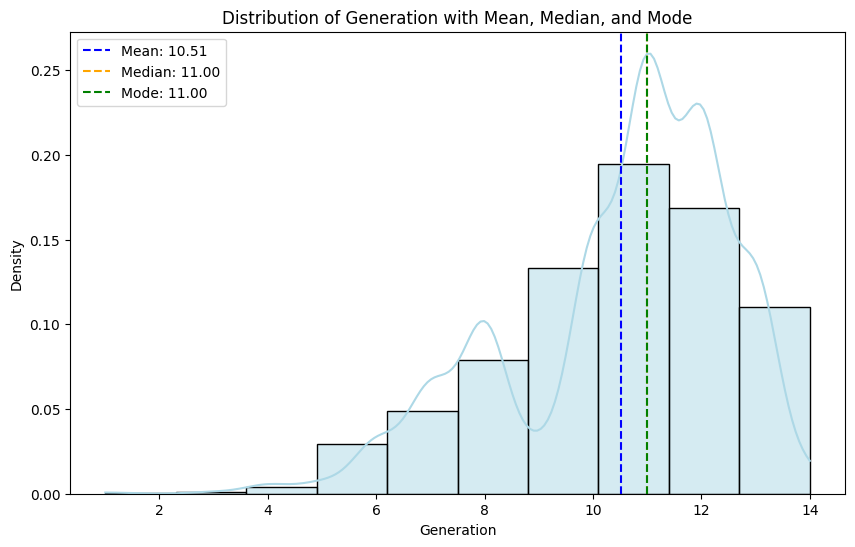

In [56]:
# Calculate mean, median, and mode
mean_Generation = df['Generation'].mean()
median_Generation = df['Generation'].median()
mode_Generation = df['Generation'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Generation'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_Generation, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_Generation))
plt.axvline(median_Generation, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_Generation))
plt.axvline(mode_Generation, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_Generation))

# Add titles and labels
plt.title('Distribution of Generation with Mean, Median, and Mode')
plt.xlabel('Generation')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

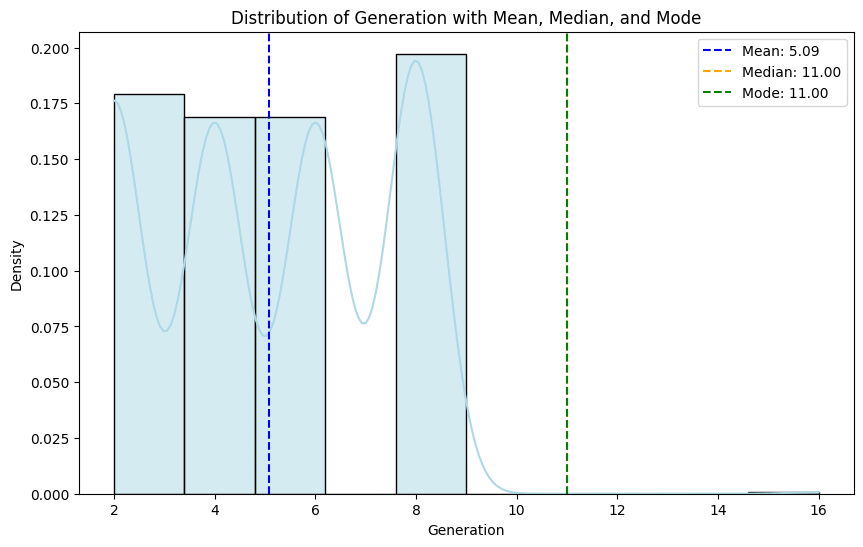

In [57]:
# Calculate mean, median, and mode
mean_Cores = df['Cores'].mean()
median_Cores = df['Cores'].median()
mode_Cores = df['Cores'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Cores'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_Cores, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_Cores))
plt.axvline(median_Generation, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_Generation))
plt.axvline(mode_Generation, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_Generation))

# Add titles and labels
plt.title('Distribution of Generation with Mean, Median, and Mode')
plt.xlabel('Generation')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [104]:
df.fillna({'Generatoin' : df['Generation'].mode()[0]})
df.fillna({'Cores' : df['Cores'].mode()[0]})

,Price,RAM,Ghz,Display,Adapter,Processor_Type,Generation,Cores,Budget_Laptop,Gaming_Laptop,...,Core i9 14th Gen,Core i9 8th Gen,Core i9 9th Gen,MediaTek Octa-core,Microsoft SQ1,Pentium Dual-Core,Pentium Gold,Pentium Quad Core,Pentium Quad-Core,Qualcomm Snapdragon Octa-Core
0,1241.460,4,2.0,11.6,45.0,MediaTek,11.0,8.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1959.606,8,4.0,15.6,65.0,Ryzen 5,11.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4239.000,16,3.3,15.6,56.0,Core i5,12.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2996.460,8,4.2,15.6,7.3,Core i5,12.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1187.460,8,1.7,15.6,45.0,Core i3,11.0,8.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,4589.460,8,1.6,14.0,65.0,Core i5,8.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3937,2161.674,8,4.0,15.6,65.0,Core i3,11.0,8.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3938,4103.460,16,3.1,15.6,120.0,Ryzen 7,11.0,8.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3939,3883.086,8,2.1,15.6,150.0,Ryzen 5,11.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
print(df.Generation.isna().sum())
print(df.Cores.isna().sum())

0
0


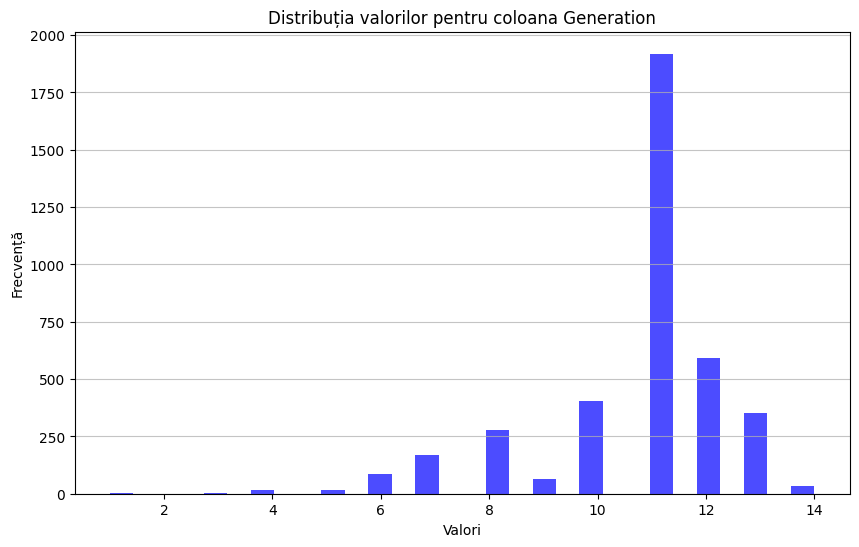

In [60]:

plt.figure(figsize=(10, 6))
plt.hist(df['Generation'], bins=30, alpha=0.7, color='blue')
plt.title('Distribuția valorilor pentru coloana Generation')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.grid(axis='y', alpha=0.75)
plt.show()


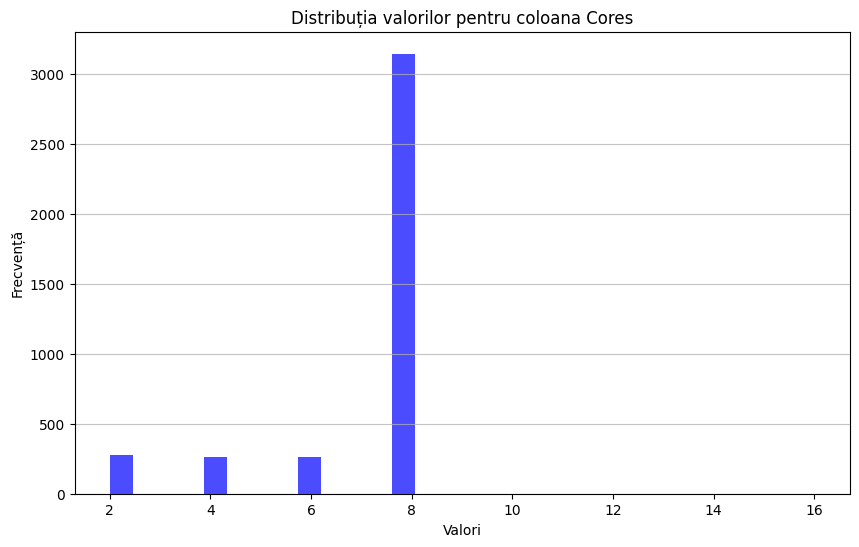

In [98]:

plt.figure(figsize=(10, 6))
plt.hist(df['Cores'], bins=30, alpha=0.7, color='blue')
plt.title('Distribuția valorilor pentru coloana Cores')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Laptop_Type - not good

In [63]:
def classify_laptop_type(cpu):
    cpu = cpu.lower()

    if any(x in cpu for x in ['i9', 'm2 max', 'm3 pro', 'ryzen 9']):
        return 'Workstation'
    elif any(x in cpu for x in ['rtx', 'gtx', 'radeon', 'gaming']):
        return 'Gaming'
    elif any(x in cpu for x in ['i7 10', 'i7 11', 'i7 12', 'i7 13', 'i7 14']):
        return 'Gaming'
    elif any(x in cpu for x in ['ryzen 7', 'ryzen 9']) and 'octa' in cpu:
        return 'Gaming'
    elif any(x in cpu for x in ['m1', 'm2', 'core m3', 'core m5', 'snapdragon']):
        return 'Ultrabook'
    elif any(x in cpu for x in ['i3', 'ryzen 3', 'pentium', 'celeron', 'atom', 'a4', 'a6', 'a8', 'a9', 'e1', 'e2']):
        return 'Budget'
    elif any(x in cpu for x in ['i5', 'ryzen 5']) and not any(gen in cpu for gen in ['5th', '6th', '4th']):
        return 'Office'
    else:
        return 'Multimedia'
    
df['Laptop_Type'] = df['Processor_Name'].apply(classify_laptop_type)

In [64]:
# One-hot encoding for the Category column
segment_dummies = pd.get_dummies(df['Laptop_Type'])
segment_dummies.columns = [col + "_Laptop" for col in segment_dummies.columns]

# Convert the one-hot encoded columns to integer type
segment_dummies = segment_dummies.astype(int)

# Join the one-hot encoded columns to the original DataFrame
df = df.join(segment_dummies)
# Drop the original Category column if no longer needed
df.drop(['Laptop_Type'], axis=1, inplace=True)
# Display the updated DataFrame
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Battery_Life,Processor_Type,Generation,Cores,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4 RAM,2.0,...,Upto 12 Hrs Battery Life,MediaTek,11.0,8.0,0,0,1,0,0,0
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4 RAM,4.0,...,Upto 11 Hrs Battery Life,Ryzen 5,11.0,6.0,0,0,0,1,0,0
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Core i5 12th Gen,Intel,32.0,16,DDR5 RAM,3.3,...,Upto 10 Hrs Battery Life,Core i5,12.0,8.0,0,0,0,1,0,0
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Core i5 12th Gen,Intel,8.0,8,DDR4 RAM,4.2,...,Upto 7.30 Hrs Battery Life,Core i5,12.0,8.0,0,0,0,1,0,0
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Core i3 11th Gen,Intel,NaN,8,LPDDR4X RAM,1.7,...,Upto 8 Hrs Battery Life,Core i3,11.0,8.0,1,0,0,0,0,0


## Actualizare coloana **GPU_Brand**

In [65]:
df[df.GPU_Brand.isna()]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Battery_Life,Processor_Type,Generation,Cores,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop
3244,3671,Lenovo,Lenovo essential G50-45 (80E300RGIN) Laptop (1...,1755.00,AMD Quad Core A8,AMD,16.0,8,DDR3 RAM,NaN,...,Upto 4 Hrs Battery Life,A8 APU,11.0,4.0,1,0,0,0,0,0
3459,3901,Lenovo,Lenovo essential G50-45 (80E3014FIN) Laptop (1...,1398.06,AMD Quad-Core A8 APU,AMD,16.0,4,DDR3 RAM,2.0,...,Upto 4 Hrs Battery Life,A8 APU,11.0,4.0,1,0,0,0,0,0
3567,4016,Apple,Apple MacBook Pro MR932HN/A Ultrabook (15.4 In...,10151.46,Core i7 8th Gen,Intel,32.0,16,DDR4 RAM,2.2,...,Upto 10 Hrs Battery Life,Core i7,8.0,8.0,0,0,1,0,0,0
3665,4121,Apple,Apple MacBook Pro MR962HN/A Ultrabook (15.4 In...,10794.60,Core i7 8th Gen,Intel,32.0,16,DDR4 RAM,2.2,...,Upto 10 Hrs Battery Life,Core i7,8.0,8.0,0,0,1,0,0,0


In urma analizei inregistrarilor cu valori lipsa se observa ca toate au acelasi brand si anume AMD. Acest reiese din coloana **GPU**.

In [66]:
df['GPU_Brand'] = df['GPU_Brand'].fillna('AMD')

###  Standardizare nume brand
Aici se observa ca numele brand-ului NVIDIA nu e consisitent pentru toate inregistrarile, asa ca va fi actualizata coloana pentru a avea doar forma *NVIDIA*.

In [67]:
df.GPU_Brand.unique()

array(['MediaTek', 'AMD', 'NVIDIA', 'Intel', 'Apple', 'Qualcomm',
       'NIVIDIA', 'Nvidia', 'ARM', 'Microsoft', 'ATI'], dtype=object)

In [68]:
df['GPU_Brand'] = df['GPU_Brand'].replace({
    'NIVIDIA': 'NVIDIA',
    'Nvidia': 'NVIDIA'
})

## Stergere coloane nefolositoare

In [69]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life', 'Processor_Type', 'Generation', 'Cores',
       'Budget_Laptop', 'Gaming_Laptop', 'Multimedia_Laptop', 'Office_Laptop',
       'Ultrabook_Laptop', 'Workstation_Laptop'],
      dtype='object')

In [70]:
df = df.drop(columns=['Unnamed: 0', 'Name',  'RAM_TYPE', 'GPU', 'Battery_Life'])
df.head()
#'Processor_Name',

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,Ghz,Display_type,Display,GPU_Brand,...,Adapter,Processor_Type,Generation,Cores,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop
0,HP,1241.460,MediaTek Octa-core,MediaTek,NaN,4,2.0,LED,11.6,MediaTek,...,45.0,MediaTek,11.0,8.0,0,0,1,0,0,0
1,Lenovo,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,4.0,LCD,15.6,AMD,...,65.0,Ryzen 5,11.0,6.0,0,0,0,1,0,0
2,Dell,4239.000,Core i5 12th Gen,Intel,32.0,16,3.3,LCD,15.6,NVIDIA,...,56.0,Core i5,12.0,8.0,0,0,0,1,0,0
3,HP,2996.460,Core i5 12th Gen,Intel,8.0,8,4.2,LCD,15.6,Intel,...,7.3,Core i5,12.0,8.0,0,0,0,1,0,0
4,Infinix,1187.460,Core i3 11th Gen,Intel,NaN,8,1.7,LCD,15.6,Intel,...,45.0,Core i3,11.0,8.0,1,0,0,0,0,0


## Analizare caracteristici

### Coloana **Pret**

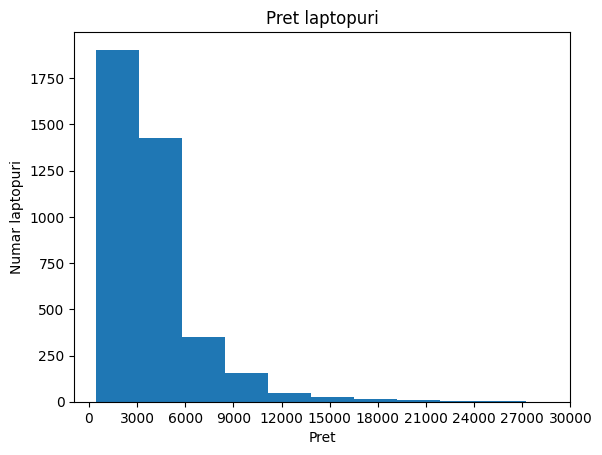

In [71]:
ax = df['Price'].plot(kind='hist', title="Pret laptopuri")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Pret')
ax.set_xticks(range(0, int(df['Price'].max()) + 3000, 3000))


### Coloana **Brand**

Text(0, 0.5, 'Numar de laptopuri')

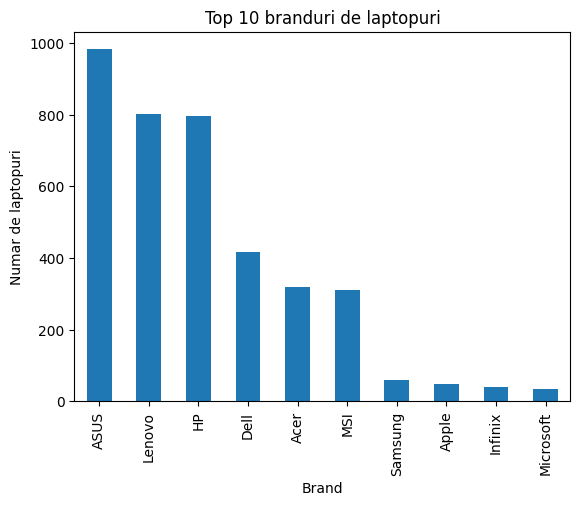

In [72]:
ax = df['Brand'].value_counts().head(10).plot(kind = 'bar', title="Top 10 branduri de laptopuri")
ax.set_ylabel('Numar de laptopuri')

### Coloana **Ghz**

Text(0.5, 0, 'Ghz')

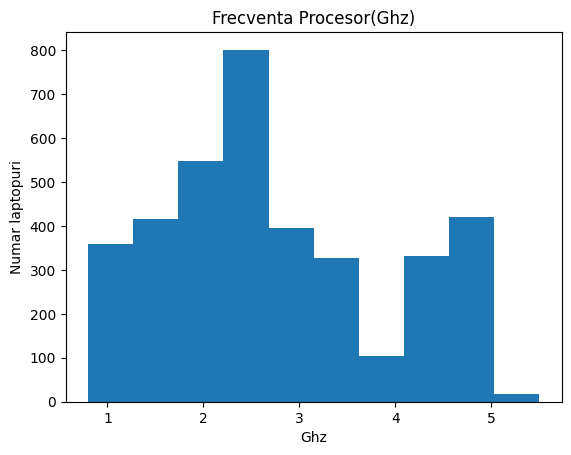

In [73]:
ax = df['Ghz'].plot(kind='hist', title="Frecventa Procesor(Ghz)")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Ghz')

### Coloana **Display**

Text(0.5, 0, 'Inch')

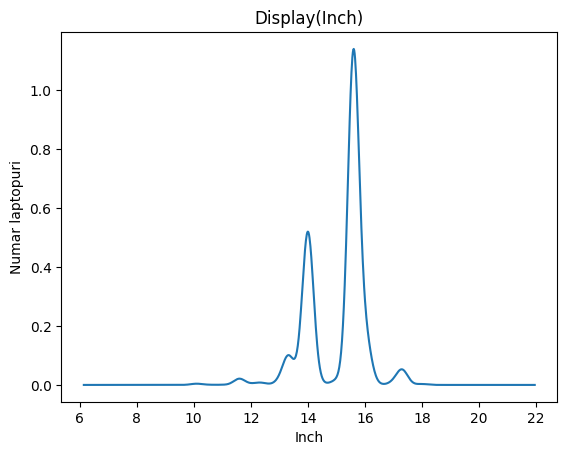

In [74]:
ax = df['Display'].plot(kind='kde', title="Display(Inch)")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Inch')

### Coloana **HDD**

<Axes: ylabel='count'>

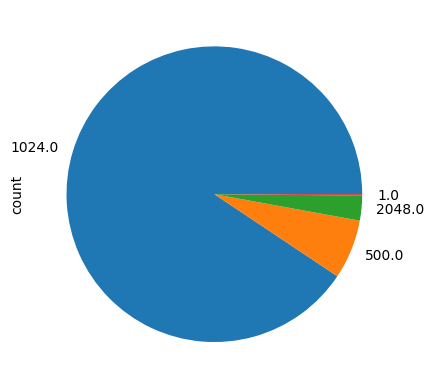

In [75]:
df['HDD'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

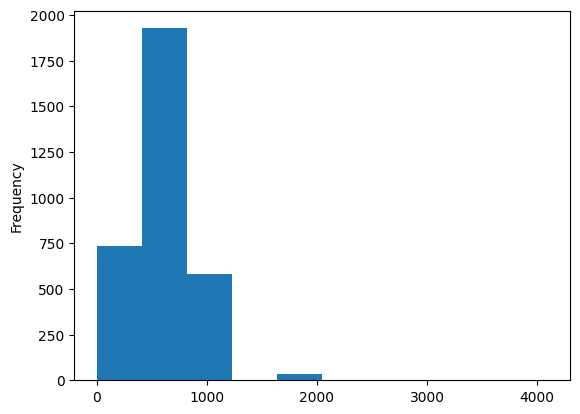

In [76]:
df['SSD'].plot(kind='hist')

### Coloana **RAM**

Text(0, 0.5, 'Numar de laptopuri')

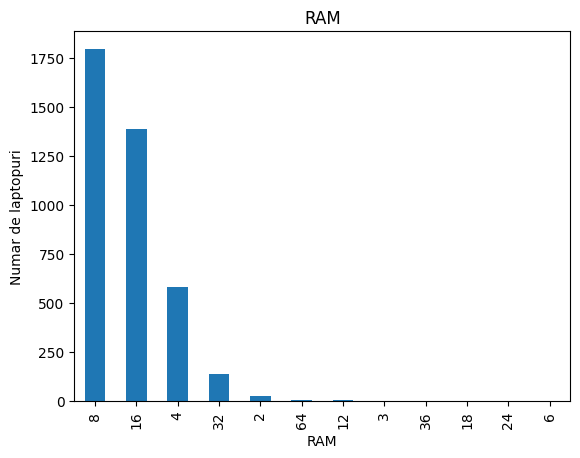

In [77]:
ax = df['RAM'].value_counts().plot(kind = 'bar', title="RAM")
ax.set_ylabel('Numar de laptopuri')

### Coloana **Adapter**

Text(0, 0.5, 'Numar de laptopuri')

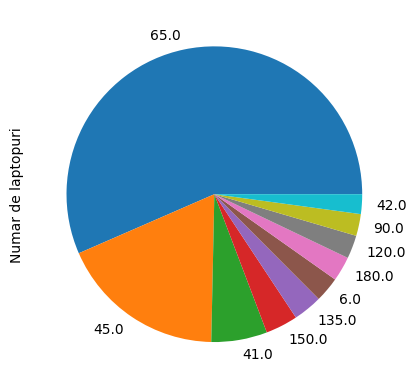

In [78]:
ax = df['Adapter'].value_counts().head(10).plot(kind = 'pie', title="")
ax.set_ylabel('Numar de laptopuri')

## Adaugare coloane noi

In [79]:
df['Has_SSD'] = df['SSD'].notna().astype(int) 
df['Has_HDD'] = df['HDD'].notna().astype(int)
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,Ghz,Display_type,Display,GPU_Brand,...,Generation,Cores,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop,Has_SSD,Has_HDD
0,HP,1241.460,MediaTek Octa-core,MediaTek,NaN,4,2.0,LED,11.6,MediaTek,...,11.0,8.0,0,0,1,0,0,0,1,0
1,Lenovo,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,4.0,LCD,15.6,AMD,...,11.0,6.0,0,0,0,1,0,0,1,0
2,Dell,4239.000,Core i5 12th Gen,Intel,32.0,16,3.3,LCD,15.6,NVIDIA,...,12.0,8.0,0,0,0,1,0,0,1,0
3,HP,2996.460,Core i5 12th Gen,Intel,8.0,8,4.2,LCD,15.6,Intel,...,12.0,8.0,0,0,0,1,0,0,1,0
4,Infinix,1187.460,Core i3 11th Gen,Intel,NaN,8,1.7,LCD,15.6,Intel,...,11.0,8.0,1,0,0,0,0,0,1,0


## Combinare coloane SSD si HDD
Cele 2 coloane reprezinta capacitatea in GB, asadar vor fi combinate, iar pentru a distinge tipul de stocare (SDD/HDD) vor fi folosite coloanele create anterior, Has_SSD si Has_HDD.

In [80]:
df['Storage'] = df['SSD'].fillna(0) + df['HDD'].fillna(0)

# stergere coloane SSD si HDD
df.drop(columns=['HDD', 'SSD'], inplace=True)

df.head()


,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,Ghz,Display_type,Display,GPU_Brand,...,Cores,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop,Has_SSD,Has_HDD,Storage
0,HP,1241.460,MediaTek Octa-core,MediaTek,NaN,4,2.0,LED,11.6,MediaTek,...,8.0,0,0,1,0,0,0,1,0,64.0
1,Lenovo,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,4.0,LCD,15.6,AMD,...,6.0,0,0,0,1,0,0,1,0,512.0
2,Dell,4239.000,Core i5 12th Gen,Intel,32.0,16,3.3,LCD,15.6,NVIDIA,...,8.0,0,0,0,1,0,0,1,0,512.0
3,HP,2996.460,Core i5 12th Gen,Intel,8.0,8,4.2,LCD,15.6,Intel,...,8.0,0,0,0,1,0,0,1,0,512.0
4,Infinix,1187.460,Core i3 11th Gen,Intel,NaN,8,1.7,LCD,15.6,Intel,...,8.0,1,0,0,0,0,0,1,0,512.0


## Tratare valori lipsa

### Vizualizare procente valori lipsa

In [81]:
df.isna().mean()*100

Brand                  0.000000
Price                  0.000000
Processor_Name         0.000000
Processor_Brand        0.000000
RAM_Expandable        54.377062
RAM                    0.000000
Ghz                    5.658462
Display_type           0.000000
Display                0.025374
GPU_Brand              0.000000
Adapter               10.479574
Processor_Type         0.000000
Generation             0.000000
Cores                  0.000000
Budget_Laptop          0.000000
Gaming_Laptop          0.000000
Multimedia_Laptop      0.000000
Office_Laptop          0.000000
Ultrabook_Laptop       0.000000
Workstation_Laptop     0.000000
Has_SSD                0.000000
Has_HDD                0.000000
Storage                0.000000
dtype: float64

In [82]:
df.dtypes

Brand                  object
Price                 float64
Processor_Name         object
Processor_Brand        object
RAM_Expandable        float64
RAM                     int64
Ghz                   float64
Display_type           object
Display               float64
GPU_Brand              object
Adapter               float64
Processor_Type         object
Generation            float64
Cores                 float64
Budget_Laptop           int64
Gaming_Laptop           int64
Multimedia_Laptop       int64
Office_Laptop           int64
Ultrabook_Laptop        int64
Workstation_Laptop      int64
Has_SSD                 int64
Has_HDD                 int64
Storage               float64
dtype: object

### Eliminare coloane cu procent mare de valori lipsa
Coloana RAM_Expandable are un procent de 54% valori lipsa, asa ca va fi eliminata.

In [83]:
df.drop(columns=['RAM_Expandable'], inplace=True)
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM,Ghz,Display_type,Display,GPU_Brand,Adapter,...,Cores,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop,Has_SSD,Has_HDD,Storage
0,HP,1241.460,MediaTek Octa-core,MediaTek,4,2.0,LED,11.6,MediaTek,45.0,...,8.0,0,0,1,0,0,0,1,0,64.0
1,Lenovo,1959.606,AMD Hexa-Core Ryzen 5,AMD,8,4.0,LCD,15.6,AMD,65.0,...,6.0,0,0,0,1,0,0,1,0,512.0
2,Dell,4239.000,Core i5 12th Gen,Intel,16,3.3,LCD,15.6,NVIDIA,56.0,...,8.0,0,0,0,1,0,0,1,0,512.0
3,HP,2996.460,Core i5 12th Gen,Intel,8,4.2,LCD,15.6,Intel,7.3,...,8.0,0,0,0,1,0,0,1,0,512.0
4,Infinix,1187.460,Core i3 11th Gen,Intel,8,1.7,LCD,15.6,Intel,45.0,...,8.0,1,0,0,0,0,0,1,0,512.0


### Inlocuire valori lipsa din coloana **Ghz**

#### Vizualizare mean, median si mode pentru a decide care va fi folosita pentru a inlocui valorile lipsa.

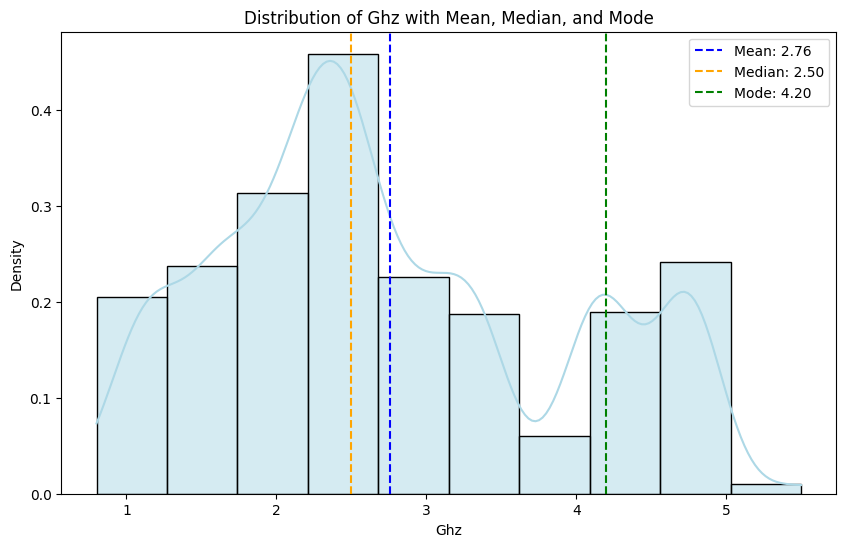

In [84]:
# Calculate mean, median, and mode
mean_ghz = df['Ghz'].mean()
median_ghz = df['Ghz'].median()
mode_ghz = df['Ghz'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Ghz'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_ghz, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_ghz))
plt.axvline(median_ghz, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_ghz))
plt.axvline(mode_ghz, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_ghz))

# Add titles and labels
plt.title('Distribution of Ghz with Mean, Median, and Mode')
plt.xlabel('Ghz')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

Se obeserva ca distributia nu e comlpet normala. Mean e mai mare decat median, iar mode e mult mai mare decat amandoua. Asadar pentru a evita outlierii se va va folosi **median**. 

In [85]:
df['Ghz'] = df['Ghz'].fillna(median_ghz)
print(df.Ghz.isna().sum())

0


### Inlocuire valori lipsa din coloana **Display**
Coloana are un singur element lipsa, asadar va fi inlocuit cu valoare care apare de cele mai mlte ori(mode).

In [86]:
mode_display = df['Display'].mode()[0]
df['Display'] = df['Display'].fillna(mode_display)
print(df.Display.isna().sum())

0


### Inlocuire valori lipsa din coloana **Adapter**

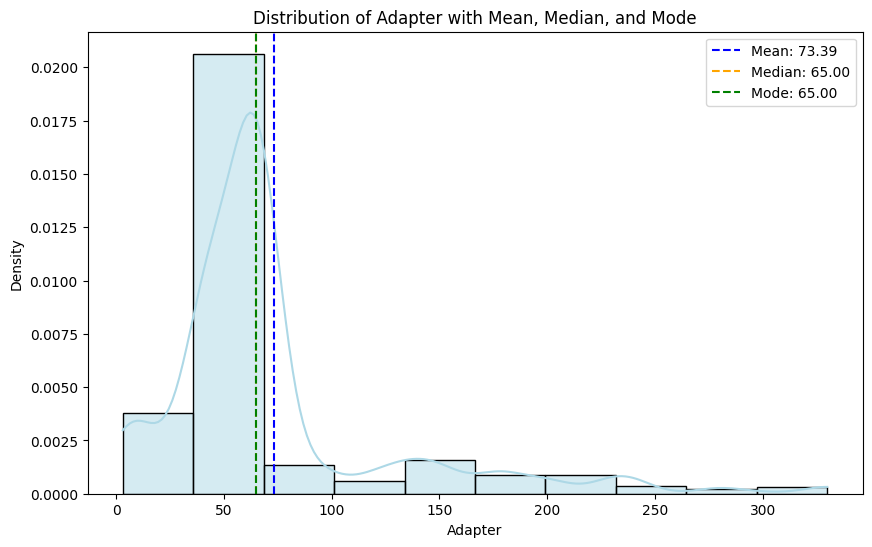

In [87]:
# Calculate mean, median, and mode
mean_adapter = df['Adapter'].mean()
median_adapter = df['Adapter'].median()
mode_adapter = df['Adapter'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Adapter'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_adapter, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_adapter))
plt.axvline(median_adapter, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_adapter))
plt.axvline(mode_adapter, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_adapter))

# Add titles and labels
plt.title('Distribution of Adapter with Mean, Median, and Mode')
plt.xlabel('Adapter')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

Se obeserva ca sunt multi outlieri, deci mean va fi afectata. Median si mode au aceeasi valoare, asadar vom alege una dintre ele, si anume **median**.

In [88]:
df['Adapter'] = df['Adapter'].fillna(median_adapter)
print(df.Adapter.isna().sum())

0


In [89]:
df.isna().sum()

Brand                 0
Price                 0
Processor_Name        0
Processor_Brand       0
RAM                   0
Ghz                   0
Display_type          0
Display               0
GPU_Brand             0
Adapter               0
Processor_Type        0
Generation            0
Cores                 0
Budget_Laptop         0
Gaming_Laptop         0
Multimedia_Laptop     0
Office_Laptop         0
Ultrabook_Laptop      0
Workstation_Laptop    0
Has_SSD               0
Has_HDD               0
Storage               0
dtype: int64

## Corelatie

### Selectarea coloanelor numerice pentru matricea de corelatie

In [90]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,Price,RAM,Ghz,Display,Adapter,Generation,Cores,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop,Has_SSD,Has_HDD,Storage
0,1241.460,4,2.0,11.6,45.0,11.0,8.0,0,0,1,0,0,0,1,0,64.0
1,1959.606,8,4.0,15.6,65.0,11.0,6.0,0,0,0,1,0,0,1,0,512.0
2,4239.000,16,3.3,15.6,56.0,12.0,8.0,0,0,0,1,0,0,1,0,512.0
3,2996.460,8,4.2,15.6,7.3,12.0,8.0,0,0,0,1,0,0,1,0,512.0
4,1187.460,8,1.7,15.6,45.0,11.0,8.0,1,0,0,0,0,0,1,0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,4589.460,8,1.6,14.0,65.0,8.0,8.0,0,0,0,1,0,0,1,0,512.0
3937,2161.674,8,4.0,15.6,65.0,11.0,8.0,1,0,0,0,0,0,1,0,256.0
3938,4103.460,16,3.1,15.6,120.0,11.0,8.0,0,1,0,0,0,0,1,0,1024.0
3939,3883.086,8,2.1,15.6,150.0,11.0,4.0,0,0,0,1,0,0,1,0,512.0


### Afisare matrice de corelatie

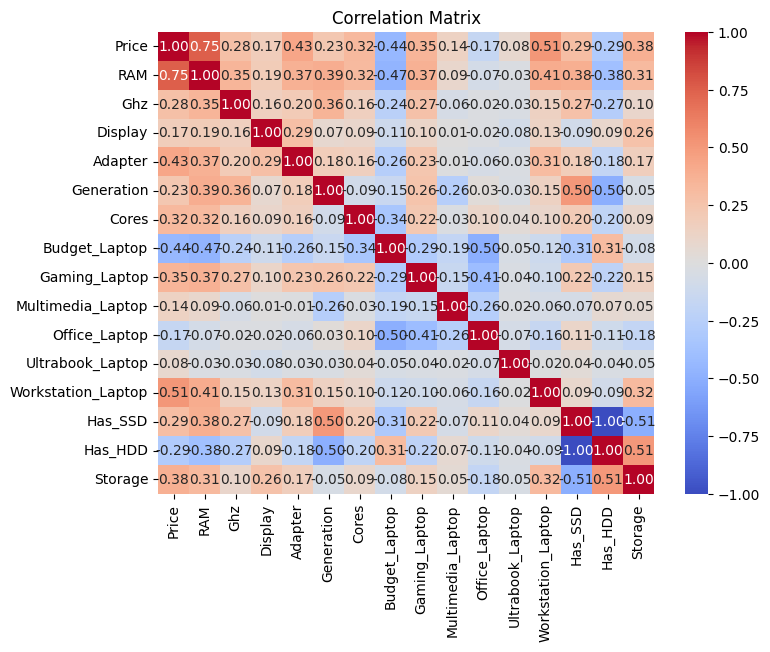

In [91]:
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [92]:
sorted_df = df.sort_values(by='Price', ascending=False).head(100)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Print the sorted DataFrame
print(sorted_df)

# Reset options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

          Brand      Price         Processor_Name Processor_Brand  RAM  Ghz  \
1235     Lenovo  27210.060       Core i9 12th Gen           Intel   32  2.3   
3504         HP  26966.142        Core i7 9th Gen           Intel   16  2.6   
1149     Lenovo  24299.460       Core i9 13th Gen           Intel   32  2.2   
2520        MSI  23759.460       Core i9 14th Gen           Intel   64  4.8   
2727       ASUS  22733.460       Core i9 12th Gen           Intel   32  2.3   
2601        MSI  22139.460       Core i9 13th Gen           Intel   64  5.5   
1069        MSI  21599.460       Core i9 14th Gen           Intel   32  1.6   
899         MSI  21059.460       Core i9 13th Gen           Intel   64  4.8   
2485       Dell  20978.460       Core i9 13th Gen           Intel   32  4.8   
1068     Lenovo  20114.460       Core i9 14th Gen           Intel   32  2.2   
951        ASUS  19709.460       Core i9 13th Gen           Intel   32  2.6   
963        ASUS  19547.460  AMD Octa-Core Ryzen 9   

## One-hot Encoding

Pentru a diferentia categoriile de branduri(laptop, cpu, gpu) la codificare se va specifica categoria in numele coloanei.


In [93]:
laptop_brands = pd.get_dummies(df['Brand'])
laptop_brands.columns = [col + "_Laptop" for col in laptop_brands.columns]

cpu_brands = pd.get_dummies(df['Processor_Brand'])
cpu_brands.columns = [col + "_CPU" for col in cpu_brands.columns]

gpu_brands = pd.get_dummies(df['GPU_Brand'])
gpu_brands.columns = [col + "_GPU" for col in gpu_brands.columns]

display_types = pd.get_dummies(df['Display_type'])
display_types.columns = [col + "_Display" for col in display_types.columns]

# gpu_types = pd.get_dummies(df['GPU'])
# gpu_type.columns = [col + "_GPU" for col in gpu_type.columns]


cpu_types = pd.get_dummies(df['Processor_Name'])
# gpu_types = pd.get_dummies(df['GPU'])


display_types = display_types.astype(int)
laptop_brands = laptop_brands.astype(int)
cpu_brands = cpu_brands.astype(int)
gpu_brands = gpu_brands.astype(int)
cpu_types = cpu_types.astype(int)
# gpu_types = gpu_types.astype(int)

df = df.join(laptop_brands)
df = df.join(cpu_brands)
df = df.join(gpu_brands)
df = df.join(display_types)
df = df.join(cpu_types)
# df = df.join(gpu_types)

# stergere coloane
df.drop(['Display_type', 'Brand', 'Processor_Brand', 'GPU_Brand', 'Processor_Name'], axis=1, inplace=True)

df.head()

,Price,RAM,Ghz,Display,Adapter,Processor_Type,Generation,Cores,Budget_Laptop,Gaming_Laptop,...,Core i9 14th Gen,Core i9 8th Gen,Core i9 9th Gen,MediaTek Octa-core,Microsoft SQ1,Pentium Dual-Core,Pentium Gold,Pentium Quad Core,Pentium Quad-Core,Qualcomm Snapdragon Octa-Core
0,1241.460,4,2.0,11.6,45.0,MediaTek,11.0,8.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1959.606,8,4.0,15.6,65.0,Ryzen 5,11.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4239.000,16,3.3,15.6,56.0,Core i5,12.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2996.460,8,4.2,15.6,7.3,Core i5,12.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1187.460,8,1.7,15.6,45.0,Core i3,11.0,8.0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Matricea de corelatie pentru toate coloanele

In [94]:
df.corr()

ValueError: could not convert string to float: 'MediaTek'

## Gini Index

In [ ]:
def gini_coefficient(data):
    sorted_data = np.sort(data)
    n = data.size
    cumulative_values = np.cumsum(sorted_data)
    gini_index = (n + 1 - 2 * np.sum(cumulative_values) / cumulative_values[-1]) / n
    return gini_index

gini_index_ghz = gini_coefficient(df['Ghz'].values)
gini_index_price = gini_coefficient(df['Price'].values)
gini_index_ram = gini_coefficient(df['RAM'].values)
gini_index_display = gini_coefficient(df['Display'].values)
gini_index_storage = gini_coefficient(df['Storage'].values)

print(f"Gini Index for Ghz: {gini_index_ghz:.4f}")
print(f"Gini Index for Price: {gini_index_price:.4f}")
print(f"Gini Index for RAM: {gini_index_ram:.4f}")
print(f"Gini Index for Disaply: {gini_index_display:.4f}")
print(f"Gini Index for Storage: {gini_index_storage:.4f}")


Gini Index for Ghz: 0.2252
Gini Index for Price: 0.3384
Gini Index for RAM: 0.2742
Gini Index for Disaply: 0.0339
Gini Index for Storage: 0.2696


### Curba lui Lorenz

In [ ]:
def plot_lorenz_curve(series):

    # Step 1: Extract and sort the values
    sorted_values = np.sort(series.dropna())

    # Step 2: Calculate cumulative values
    n = len(sorted_values)
    cumulative_values = np.cumsum(sorted_values)
    total = cumulative_values[-1]
    cumulative_proportions = cumulative_values / total

    # Step 3: Create cumulative population proportions
    population_proportions = np.arange(1, n + 1) / n

    # Step 4: Plot the Lorenz curve
    plt.figure(figsize=(8, 6))
    plt.plot(population_proportions, cumulative_proportions, label='Lorenz Curve', color='blue')
    plt.plot([0, 1], [0, 1], label='Line of Equality', color='red', linestyle='--')
    plt.title(f'Lorenz Curve for {series.name}')
    plt.xlabel('Cumulative Share of Population')
    plt.ylabel('Cumulative Share of Values')
    plt.legend()
    plt.grid()
    plt.show()

#### Coloana **Ghz**

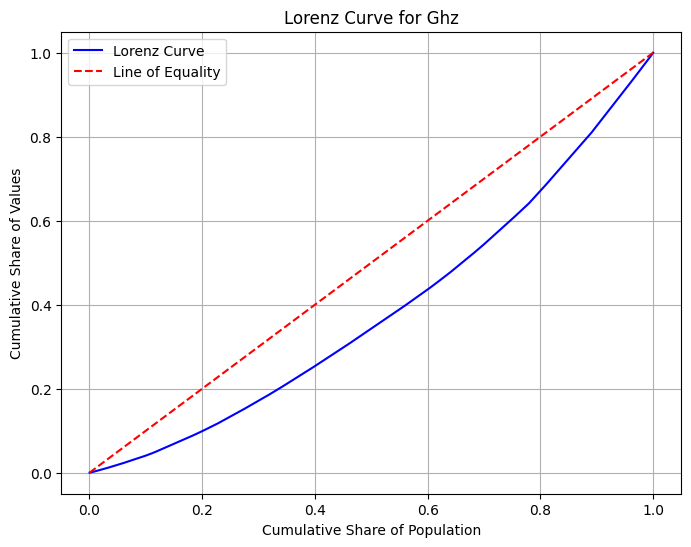

In [ ]:
plot_lorenz_curve(df['Ghz'])

#### Coloana **Price**

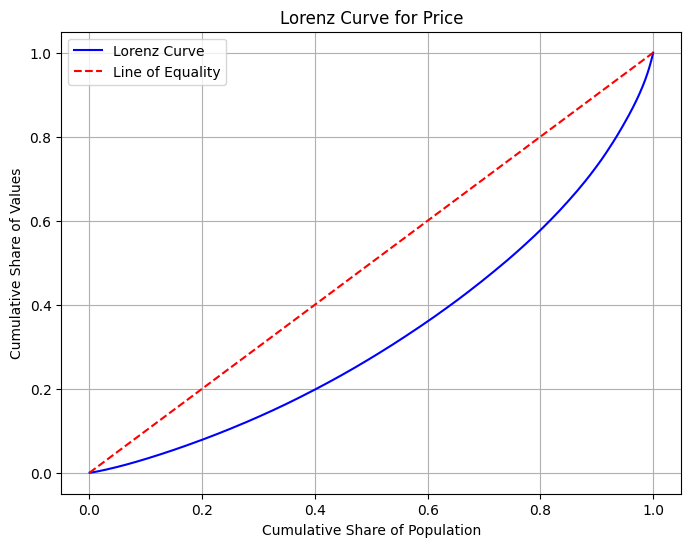

In [ ]:
plot_lorenz_curve(df['Price'])

#### Coloana **RAM**

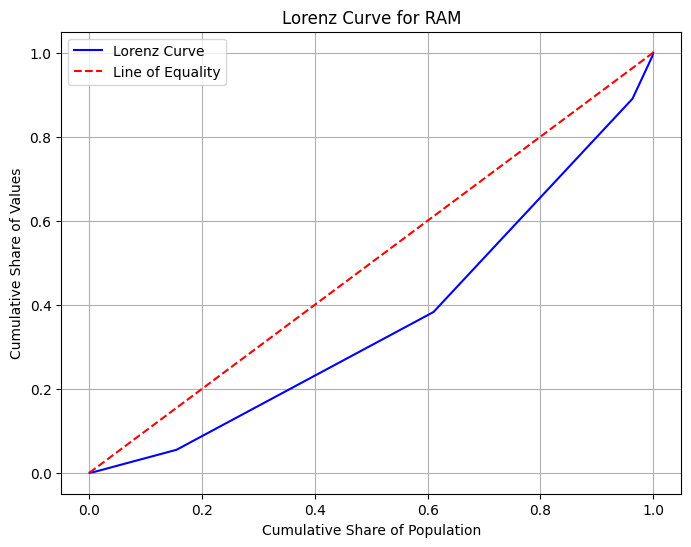

In [ ]:
plot_lorenz_curve(df['RAM'])

#### Coloana **Display**

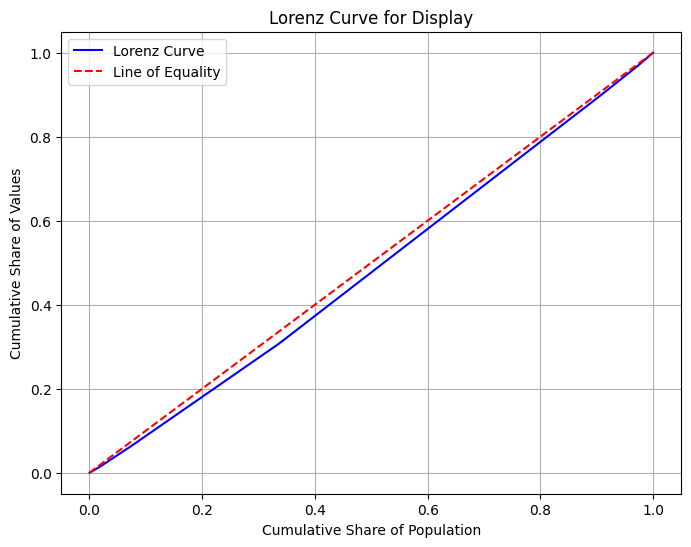

In [ ]:
plot_lorenz_curve(df['Display'])

#### Coloana **Storage**

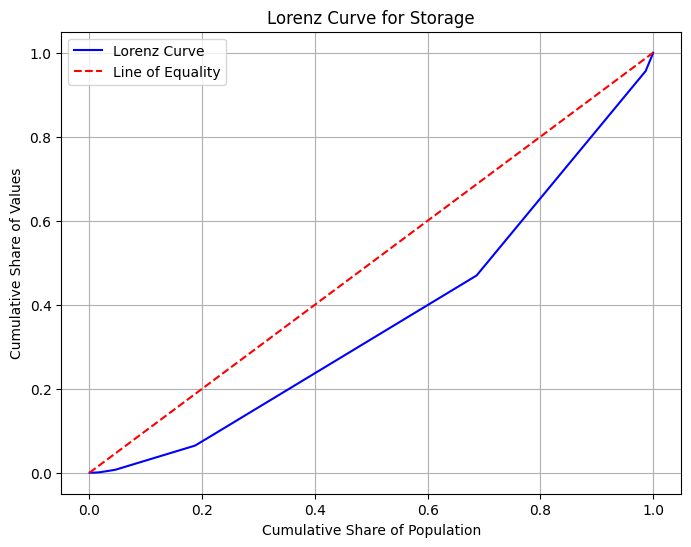

In [ ]:
plot_lorenz_curve(df['Storage'])

## Relatii intre Price si celelalte coloane

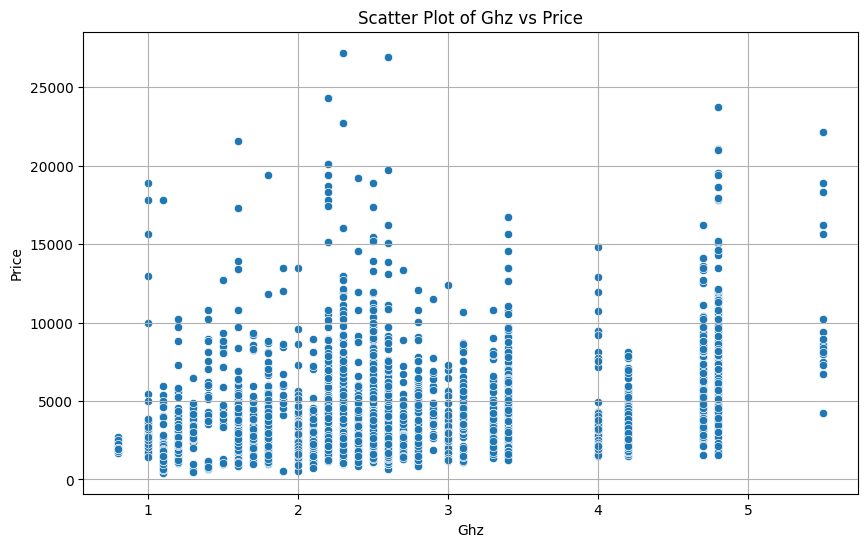

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ghz', y='Price')
plt.title('Scatter Plot of Ghz vs Price')
plt.xlabel('Ghz')
plt.ylabel('Price')
plt.grid()
plt.show()

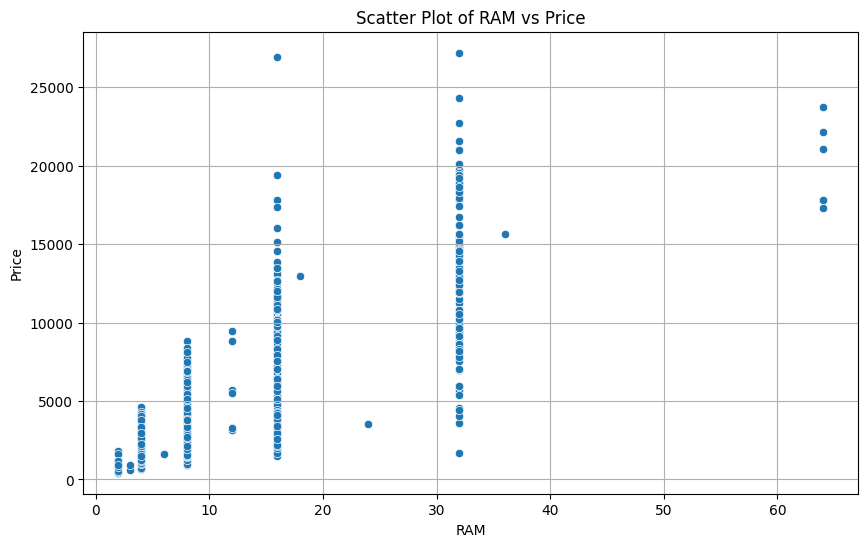

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Price')
plt.title('Scatter Plot of RAM vs Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.grid()
plt.show()

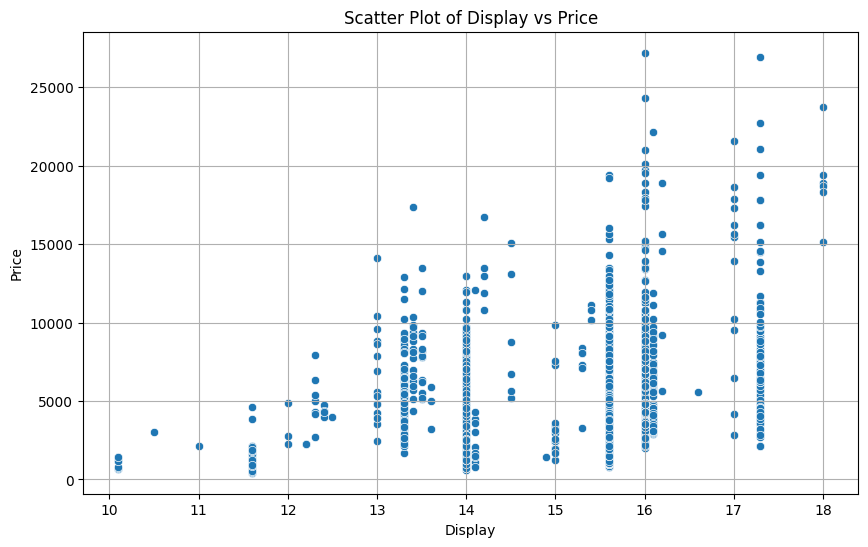

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Display', y='Price')
plt.title('Scatter Plot of Display vs Price')
plt.xlabel('Display')
plt.ylabel('Price')
plt.grid()
plt.show()

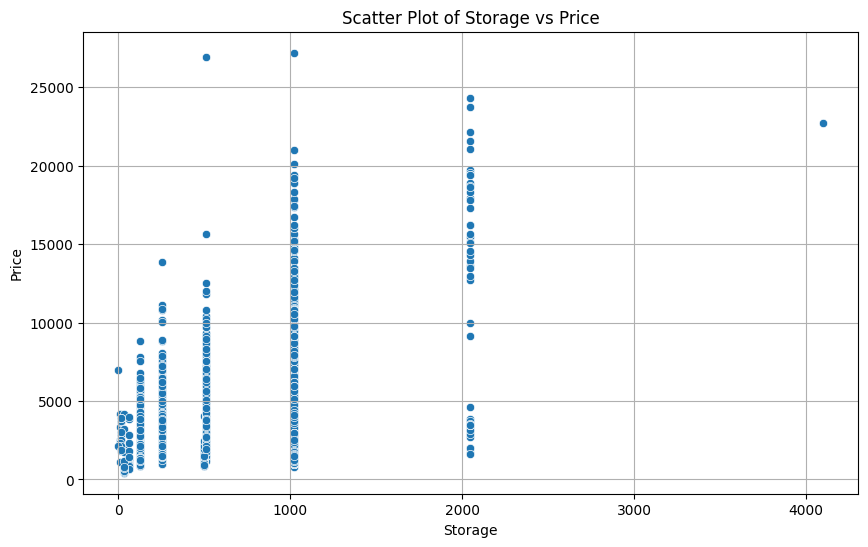

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Storage', y='Price')
plt.title('Scatter Plot of Storage vs Price')
plt.xlabel('Storage')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
price_correlations = df.corr()['Price'].apply(abs).sort_values(ascending=False)
price_correlations

Price                        1.000000
RAM                          0.751975
Workstation_Laptop           0.512899
Budget_Laptop                0.443786
Adapter                      0.433341
                               ...   
Core M3 6th Gen              0.001511
AMD Quad-Core Ryzen 7        0.001397
AMD Octa-Core Ryzen 7 Pro    0.001237
AMD Hexa Core Ryzen 5        0.001048
Core M5 6th Gen              0.000234
Name: Price, Length: 152, dtype: float64

In [ ]:
selected_features = price_correlations[:50].index.tolist()
# selected_features.remove('Price')
selected_features

['Price',
 'RAM',
 'Workstation_Laptop',
 'Budget_Laptop',
 'Adapter',
 'NVIDIA_GPU',
 'Storage',
 'Gaming_Laptop',
 'Has_HDD',
 'Has_SSD',
 'Core i9 14th Gen',
 'Ghz',
 'Intel_GPU',
 'Core i9 13th Gen',
 'Core i9 12th Gen',
 'Core i7 12th Gen',
 'AMD_GPU',
 'MSI_Laptop',
 'AMD Octa-Core Ryzen 9',
 'Core i7 13th Gen',
 'Display',
 'Office_Laptop',
 'Core Ultra 7',
 'Apple_Laptop',
 'Core Ultra 9',
 'Celeron Dual-Core',
 'Apple_GPU',
 'Apple_CPU',
 'Core i3 11th Gen',
 'LED_Display',
 'LCD_Display',
 'Multimedia_Laptop',
 'Core i3 10th Gen',
 'Core i7 11th Gen',
 'Core i9 10th Gen',
 'Apple M2 Max',
 'Core i3 7th Gen',
 'AMD Dual-Core Ryzen 3',
 'Core i7 14th Gen',
 'Core i3 12th Gen',
 'AMD Octa-Core Ryzen 7',
 'Core i3 6th Gen',
 'Pentium Quad-Core',
 'AMD Quad-Core Ryzen 5',
 'Apple M2 Pro',
 'Lenovo_Laptop',
 'Core i7 9th Gen',
 'Razer_Laptop',
 'Samsung_Laptop',
 'Acer_Laptop']

In [ ]:
# low_price_df = df[df['Price'] < 10000]
# low_price_df.head()


In [ ]:
# df['Price_per_Ghz'] = df['Price'] / df['Ghz']
# df['Price_per_RAM'] = df['Price'] / df['RAM']
# df['Price_per_Storage'] = df['Price'] / df['Storage']
# df['Price_per_Display'] = df['Price'] / df['Display']
# df['Price_per_Adapter'] = df['Price'] / df['Adapter']


df['RAM_to_Storage_Ratio'] = df['RAM'] / df['Storage'] # corelatie de 0.99 cu Price_per_storage
df['Peformance(Ghz*RAM)'] = df['Ghz'] * df['RAM']
# df['Display_times_RAM'] = df['Display'] * df['RAM'] # corelatie de 0.99 cu RAM
# df['Ghz_times_Adapter'] = df['Ghz'] * df['Adapter'] # corelatie de 1.00 cu Adapter
df['Storage_times_RAM'] = df['Storage'] * df['RAM']
df['Display_to_Adapter'] = df['Display'] / df['Adapter'] 
df['Display_times_Adapter'] = df['Display'] * df['Adapter'] 
# df['Display_times_Ghz'] = df['Display'] * df['Ghz'] # corelatie de 0.99 cu Ghz
df['Display_to_RAM'] = df['Display'] / df['RAM']

df.head()

,Price,RAM,Ghz,Display,Adapter,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,...,Pentium Gold,Pentium Quad Core,Pentium Quad-Core,Qualcomm Snapdragon Octa-Core,RAM_to_Storage_Ratio,Peformance(Ghz*RAM),Storage_times_RAM,Display_to_Adapter,Display_times_Adapter,Display_to_RAM
0,1241.460,4,2.0,11.6,45.0,0,0,1,0,0,...,0,0,0,0,0.062500,8.0,256.0,0.257778,522.00,2.900
1,1959.606,8,4.0,15.6,65.0,0,0,0,1,0,...,0,0,0,0,0.015625,32.0,4096.0,0.240000,1014.00,1.950
2,4239.000,16,3.3,15.6,56.0,0,0,0,1,0,...,0,0,0,0,0.031250,52.8,8192.0,0.278571,873.60,0.975
3,2996.460,8,4.2,15.6,7.3,0,0,0,1,0,...,0,0,0,0,0.015625,33.6,4096.0,2.136986,113.88,1.950
4,1187.460,8,1.7,15.6,45.0,1,0,0,0,0,...,0,0,0,0,0.015625,13.6,4096.0,0.346667,702.00,1.950


## Segmentare date

Crearea unei noi coloane care imparteste laptopurile in low-end, middrange si high-end pe baza pretului.

Dupa adaugarea coloanei am obtinut un rezultat de la 38% la 50% pt XGBoost.

In [ ]:
# Calculate quartiles
Q1 = df['Price'].quantile(0.25)
Q2 = df['Price'].quantile(0.50)
Q3 = df['Price'].quantile(0.75)
# Create segmentation column
def segment_laptop(price):
   if price < Q1:
       return 'Low-End'
   elif Q1 <= price < Q3:
       return 'Mid-Range'
   else:
       return 'High-End'
df['Category'] = df['Price'].apply(segment_laptop)
df.head()

,Price,RAM,Ghz,Display,Adapter,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,...,Pentium Quad Core,Pentium Quad-Core,Qualcomm Snapdragon Octa-Core,RAM_to_Storage_Ratio,Peformance(Ghz*RAM),Storage_times_RAM,Display_to_Adapter,Display_times_Adapter,Display_to_RAM,Category
0,1241.460,4,2.0,11.6,45.0,0,0,1,0,0,...,0,0,0,0.062500,8.0,256.0,0.257778,522.00,2.900,Low-End
1,1959.606,8,4.0,15.6,65.0,0,0,0,1,0,...,0,0,0,0.015625,32.0,4096.0,0.240000,1014.00,1.950,Low-End
2,4239.000,16,3.3,15.6,56.0,0,0,0,1,0,...,0,0,0,0.031250,52.8,8192.0,0.278571,873.60,0.975,Mid-Range
3,2996.460,8,4.2,15.6,7.3,0,0,0,1,0,...,0,0,0,0.015625,33.6,4096.0,2.136986,113.88,1.950,Mid-Range
4,1187.460,8,1.7,15.6,45.0,1,0,0,0,0,...,0,0,0,0.015625,13.6,4096.0,0.346667,702.00,1.950,Low-End


In [ ]:
# Aggregate data
summary = df.groupby('Category').agg(
    Count=('Price', 'count'),
    Min_Price=('Price', 'min'),
    Max_Price=('Price', 'max')
).reset_index()
print(summary)

    Category  Count  Min_Price  Max_Price
0   High-End    991   4589.460  27210.060
1    Low-End    985    431.460   2149.146
2  Mid-Range   1965   2150.658   4587.840


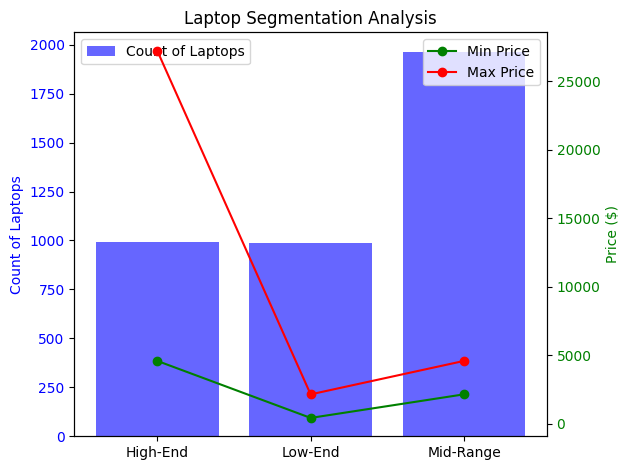

In [ ]:
# Plotting
fig, ax1 = plt.subplots()
# Bar chart for count of laptops
ax1.bar(summary['Category'], summary['Count'], color='b', alpha=0.6, label='Count of Laptops')
ax1.set_ylabel('Count of Laptops', color='b')
ax1.tick_params(axis='y', labelcolor='b')
# Create a second y-axis for min and max prices
ax2 = ax1.twinx()
ax2.plot(summary['Category'], summary['Min_Price'], color='g', marker='o', label='Min Price')
ax2.plot(summary['Category'], summary['Max_Price'], color='r', marker='o', label='Max Price')
ax2.set_ylabel('Price ($)', color='g')
ax2.tick_params(axis='y', labelcolor='g')
# Adding titles and legends
plt.title('Laptop Segmentation Analysis')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#### One hot encode coloana __Category__


In [ ]:
# One-hot encoding for the Category column
segment_dummies = pd.get_dummies(df['Category'])
segment_dummies.columns = [col + "_Category" for col in segment_dummies.columns]

# Convert the one-hot encoded columns to integer type
segment_dummies = segment_dummies.astype(int)

# Join the one-hot encoded columns to the original DataFrame
df = df.join(segment_dummies)
# Drop the original Category column if no longer needed
df.drop(['Category'], axis=1, inplace=True)
# Display the updated DataFrame
df.head()

,Price,RAM,Ghz,Display,Adapter,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,...,Qualcomm Snapdragon Octa-Core,RAM_to_Storage_Ratio,Peformance(Ghz*RAM),Storage_times_RAM,Display_to_Adapter,Display_times_Adapter,Display_to_RAM,High-End_Category,Low-End_Category,Mid-Range_Category
0,1241.460,4,2.0,11.6,45.0,0,0,1,0,0,...,0,0.062500,8.0,256.0,0.257778,522.00,2.900,0,1,0
1,1959.606,8,4.0,15.6,65.0,0,0,0,1,0,...,0,0.015625,32.0,4096.0,0.240000,1014.00,1.950,0,1,0
2,4239.000,16,3.3,15.6,56.0,0,0,0,1,0,...,0,0.031250,52.8,8192.0,0.278571,873.60,0.975,0,0,1
3,2996.460,8,4.2,15.6,7.3,0,0,0,1,0,...,0,0.015625,33.6,4096.0,2.136986,113.88,1.950,0,0,1
4,1187.460,8,1.7,15.6,45.0,1,0,0,0,0,...,0,0.015625,13.6,4096.0,0.346667,702.00,1.950,0,1,0


#### Creare coloana noua - Display_category

creare coloana noua pt a imparti coloana Display in small/medium/large

In [ ]:
# Define bins and labels for categorization
bins = [0, 13, 15.6, np.inf]
labels = ['Small', 'Medium', 'Large']
# Create a new column 'Display_Category' based on 'Display' size
df['Display_Category'] = pd.cut(df['Display'], bins=bins, labels=labels, right=False)
# Example showing the result
df.head()

,Price,RAM,Ghz,Display,Adapter,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,...,RAM_to_Storage_Ratio,Peformance(Ghz*RAM),Storage_times_RAM,Display_to_Adapter,Display_times_Adapter,Display_to_RAM,High-End_Category,Low-End_Category,Mid-Range_Category,Display_Category
0,1241.460,4,2.0,11.6,45.0,0,0,1,0,0,...,0.062500,8.0,256.0,0.257778,522.00,2.900,0,1,0,Small
1,1959.606,8,4.0,15.6,65.0,0,0,0,1,0,...,0.015625,32.0,4096.0,0.240000,1014.00,1.950,0,1,0,Large
2,4239.000,16,3.3,15.6,56.0,0,0,0,1,0,...,0.031250,52.8,8192.0,0.278571,873.60,0.975,0,0,1,Large
3,2996.460,8,4.2,15.6,7.3,0,0,0,1,0,...,0.015625,33.6,4096.0,2.136986,113.88,1.950,0,0,1,Large
4,1187.460,8,1.7,15.6,45.0,1,0,0,0,0,...,0.015625,13.6,4096.0,0.346667,702.00,1.950,0,1,0,Large


In [ ]:
# One-hot encoding for the Category column
segment_dummies = pd.get_dummies(df['Display_Category'])
segment_dummies.columns = [col + "_Display" for col in segment_dummies.columns]

# Convert the one-hot encoded columns to integer type
segment_dummies = segment_dummies.astype(int)

# Join the one-hot encoded columns to the original DataFrame
df = df.join(segment_dummies)
# Drop the original Category column if no longer needed
df.drop(['Display_Category'], axis=1, inplace=True)
# Display the updated DataFrame
df.head()

,Price,RAM,Ghz,Display,Adapter,Budget_Laptop,Gaming_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,...,Storage_times_RAM,Display_to_Adapter,Display_times_Adapter,Display_to_RAM,High-End_Category,Low-End_Category,Mid-Range_Category,Small_Display,Medium_Display,Large_Display
0,1241.460,4,2.0,11.6,45.0,0,0,1,0,0,...,256.0,0.257778,522.00,2.900,0,1,0,1,0,0
1,1959.606,8,4.0,15.6,65.0,0,0,0,1,0,...,4096.0,0.240000,1014.00,1.950,0,1,0,0,0,1
2,4239.000,16,3.3,15.6,56.0,0,0,0,1,0,...,8192.0,0.278571,873.60,0.975,0,0,1,0,0,1
3,2996.460,8,4.2,15.6,7.3,0,0,0,1,0,...,4096.0,2.136986,113.88,1.950,0,0,1,0,0,1
4,1187.460,8,1.7,15.6,45.0,1,0,0,0,0,...,4096.0,0.346667,702.00,1.950,0,1,0,0,0,1


In [ ]:
low_price_df = df[df['Price'] < 10000]
# low_price_df['Price'] = np.log(low_price_df['Price'])

# low_price_df = df
# low_price_df.head()


In [ ]:
price_correlations = low_price_df.corr()['Price'].apply(abs).sort_values(ascending=False)
price_correlations[:5]

Price                1.000000
High-End_Category    0.815771
RAM                  0.682224
Storage_times_RAM    0.623172
Display_to_RAM       0.608341
Name: Price, dtype: float64

In [ ]:
selected_features = price_correlations[:].index.tolist()
# selected_features.remove('Price')
selected_features

['Price',
 'High-End_Category',
 'RAM',
 'Storage_times_RAM',
 'Display_to_RAM',
 'Peformance(Ghz*RAM)',
 'Low-End_Category',
 'Budget_Laptop',
 'Gaming_Laptop',
 'NVIDIA_GPU',
 'Adapter',
 'Display_times_Adapter',
 'Has_HDD',
 'Has_SSD',
 'Ghz',
 'Workstation_Laptop',
 'Core i7 13th Gen',
 'Core i7 12th Gen',
 'Intel_GPU',
 'Core Ultra 7',
 'AMD_GPU',
 'Celeron Dual-Core',
 'AMD Octa-Core Ryzen 9',
 'AMD Octa-Core Ryzen 7',
 'Core i3 11th Gen',
 'Storage',
 'Core i7 11th Gen',
 'MSI_Laptop',
 'Core i3 10th Gen',
 'Mid-Range_Category',
 'Multimedia_Laptop',
 'Apple_Laptop',
 'Core i7 14th Gen',
 'Core i3 7th Gen',
 'Core i7 10th Gen',
 'LCD_Display',
 'LED_Display',
 'AMD Dual-Core Ryzen 3',
 'Samsung_Laptop',
 'Pentium Quad-Core',
 'Core i3 6th Gen',
 'Core i3 12th Gen',
 'Core i7 8th Gen',
 'Display_to_Adapter',
 'Core i9 13th Gen',
 'Apple_CPU',
 'Apple_GPU',
 'AMD Dual-Core Athlon',
 'Small_Display',
 'Apple M2',
 'Microsoft_Laptop',
 'AMD Quad-Core Ryzen 3',
 'AMD Quad-Core Ryzen 

In [ ]:
# low_price_df = df[df['Price'] < 100000]
# low_price_df

# low_price_df = df

# limited_df = df[selected_features].copy()
limited_df = low_price_df[selected_features].copy()
# limited_df = low_price_df.copy()

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(limited_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
# # # Calculate the correlation matrix
# correlation_matrix = df[['Price', 'Price_per_Ghz', 'Price_per_RAM', 'Price_per_Storage',  'Price_per_Adapter', 'Price_per_Display', 'Ghz', 'RAM', 'Display',
#                          'Storage', 'Adapter']].corr()
# # correlation_matrix = df[[ 'Price','RAM_to_Storage_Ratio', 'Peformance(Ghz*RAM)', 'Display_times_RAM', 'Ghz_times_Adapter',  'Storage_times_RAM',
# #                          'Display_to_Adapter', 'Display_times_Adapter', 'Display_times_Ghz', 'Display_to_RAM', 'Price_per_Ghz', 'Price_per_RAM', 'Price_per_Storage',  'Price_per_Adapter' ]].corr()

# # Create a heatmap
# plt.figure(figsize=(20, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
# plt.title('Correlation Heatmap')
# plt.show()

###  Trransformare logaritmica pentru coloana __Pret__

In [ ]:
# df['Price'] = np.log(df['Price'])
# df.head()

# from sklearn.preprocessing import MinMaxScaler

# # scaler = MinMaxScaler()
# # df['Price'] = scaler.fit_transform(df[['Price']])


# from scipy import stats

# df['Price'], _ = stats.boxcox(df['Price'] + 1)  # Adding 1 to avoid zero values

# df.head()

## Modele

### Impartire dataset
70% antrenare, 30% testare

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# imartire dataset - 70% antrenare, 30% testare
X, y = limited_df.drop(columns=['Price']), limited_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3030, 163), (758, 163), (3030,), (758,))

### Linear Regression

In [ ]:
# antrenarea modelului
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predictia pretului
y_pred = lr_model.predict(X_test)

# calcularea erorilor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3f}")

r2 = lr_model.score(X_test, y_test)
print(f"R Squared: {r2:.3f}")

MSE: 629756.576
MAE: 527.609
MAPE: 0.151
R Squared: 0.831


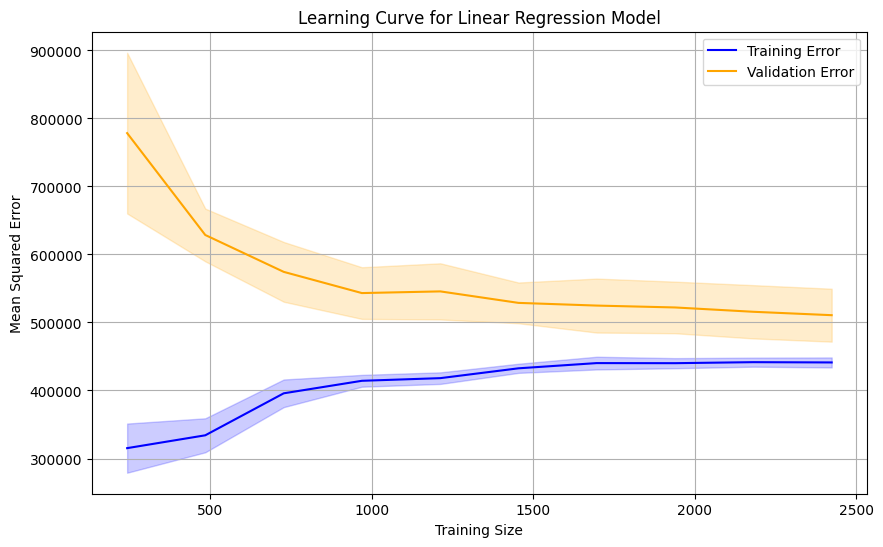

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Compute mean and std of train and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='orange')

# Plot shaded areas for standard deviation
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 color='blue', alpha=0.2)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 color='orange', alpha=0.2)

plt.title('Learning Curve for Linear Regression Model')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

#### Scatter Plot Valori Prezise vs Valori Corecte

Se observa ca modelul este destul de bun pentru preturi mici, dar pentru preturi mari acuratetea este slaba (valorile prezise sunt mai mici decat ar trebui).

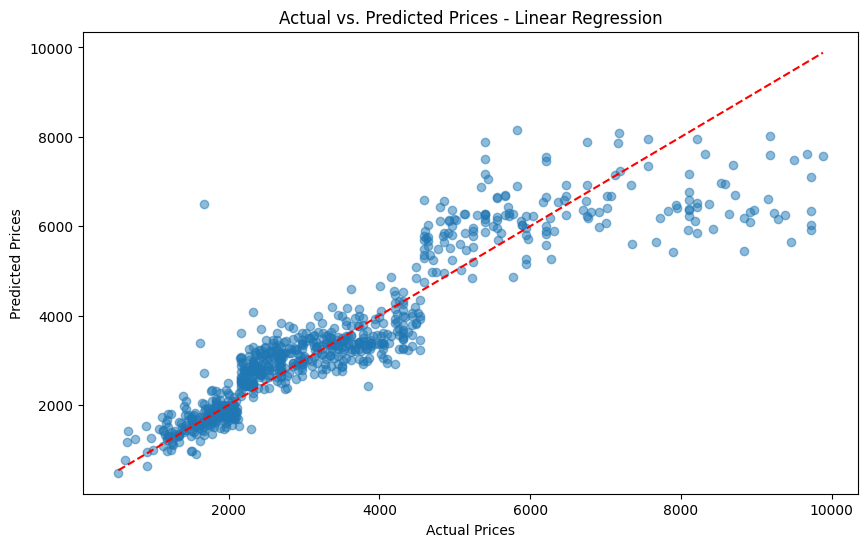

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - Linear Regression')
plt.show()

#### Residual Plot

L-am folosit pentru a vedea diferenta dintre valorile prezise si cele corecte. Aici se observa ca modelul are heteroscedasticitate (erorile de predictie cresc odata cu pretul).

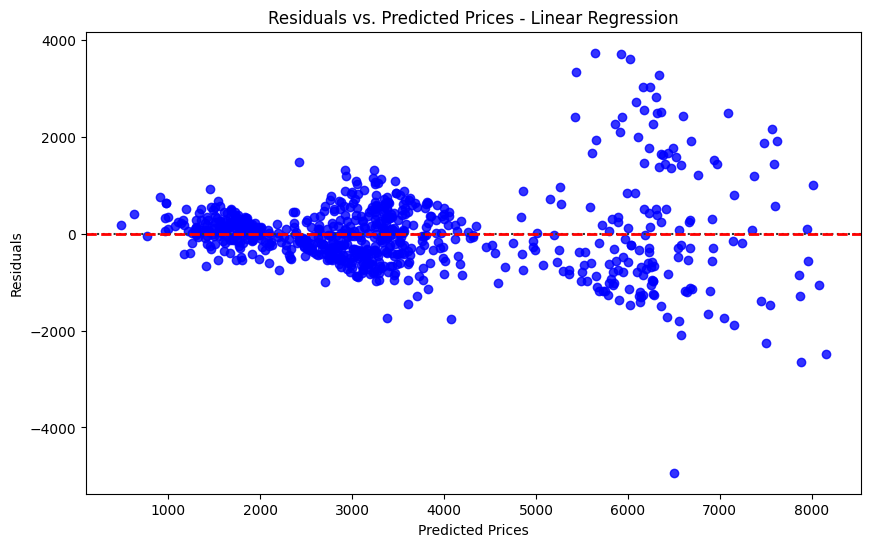

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - Linear Regression')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.show()

### Decision Tree Regressor

In [ ]:
# Antrenarea modelului
dtr_model = DecisionTreeRegressor(random_state=1, max_depth=10, min_samples_split=60, min_samples_leaf=1)
dtr_model.fit(X_train, y_train)

# Predictia pretului
y_pred = dtr_model.predict(X_test)

# Calcularea erorilor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3f}")

r2 = dtr_model.score(X_test, y_test)
print(f"R Squared: {r2:.3f}")

# MSE: 1690069.742
# MAE: 674.958
# MAPE: 0.154
# R Squared: 0.746

MSE: 614100.670
MAE: 508.246
MAPE: 0.142
R Squared: 0.835


#### GridSearch
Pentru a gasi cei mai buni parametri.

In [ ]:
# param_grid = {
#     'max_depth': [None, 5, 10, 15, 20, 12],
#     'min_samples_split': [ 2, 5, 10, 60],
#     'min_samples_leaf': [1, 2, 4, 5, 8],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Set up the grid search
# grid_search = GridSearchCV(estimator=dtr_model, param_grid=param_grid, 
#                            scoring='neg_mean_absolute_error', cv=5, 
#                            n_jobs=-1, error_score='raise')

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best MAE:", -grid_search.best_score_)

#### Scatter Plot Valori Prezise vs Valori Corecte

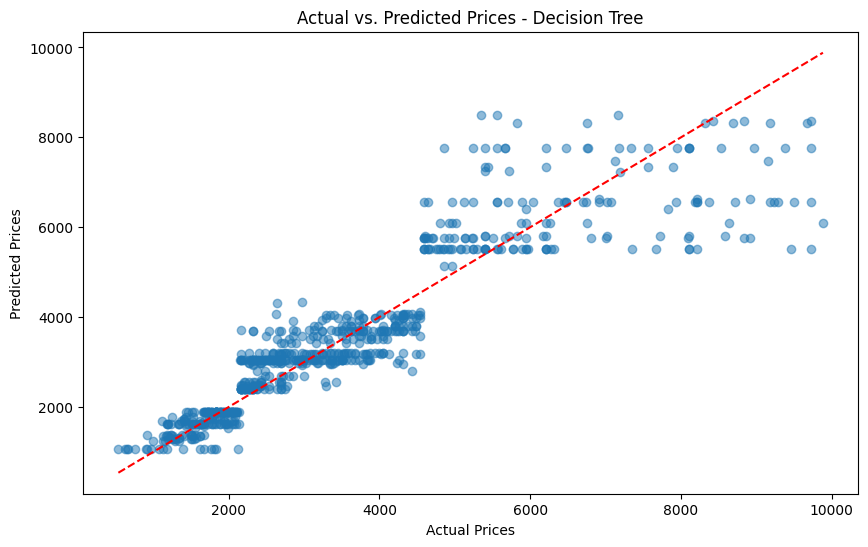

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - Decision Tree')
plt.show()

#### Residual Plot

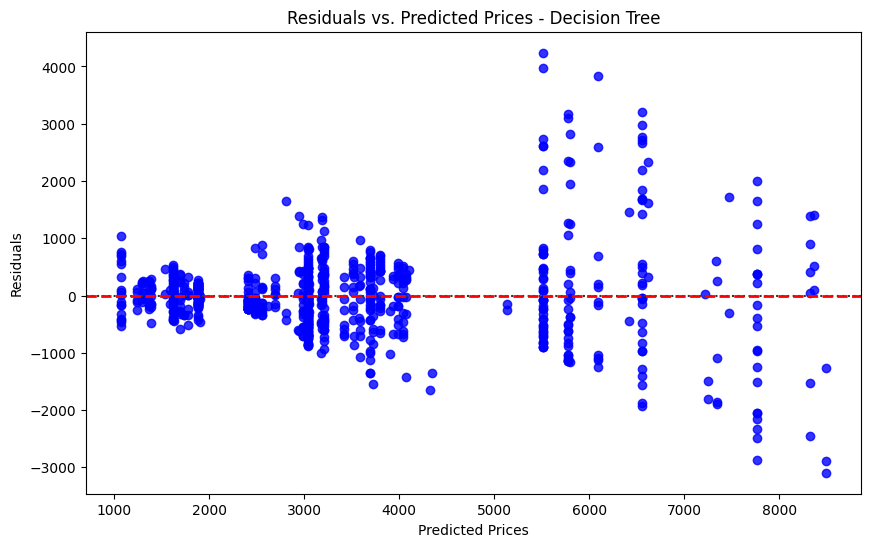

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - Decision Tree')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.show()

### Random Forest Regressor


In [ ]:
# Antrenarea modelului
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features='log2')  
rf_model.fit(X_train, y_train)

# Predictia pretului
y_pred = rf_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


# Calcularea erorilor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3f}")

r2 = rf_model.score(X_test, y_test)
print(f"R Squared: {r2:.3f}")

threshold_percentage = 0.05  # 10%

# Calculate the number of correct predictions
correct_predictions = np.abs(y_test - y_pred) <= (threshold_percentage * np.abs(y_test))

# Calculate the percentage of correct predictions
correct_percentage = np.mean(correct_predictions) * 100

print(f"Percentage of Correct Predictions (within {threshold_percentage * 100:.0f}%): {correct_percentage:.2f}%")


MSE: 572995.758
MAE: 488.591
MAPE: 0.140
R Squared: 0.846
Percentage of Correct Predictions (within 5%): 25.99%


#### GridSearch

In [ ]:
# rf_model = RandomForestRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 5, 10],
#     'max_features': ['sqrt', 'log2', None]
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
#                            scoring='neg_mean_absolute_error', cv=5, 
#                            n_jobs=-1, error_score='raise')

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best MAE:", -grid_search.best_score_)

#### Scatter Plot Valori Prezise vs Valori Corecte

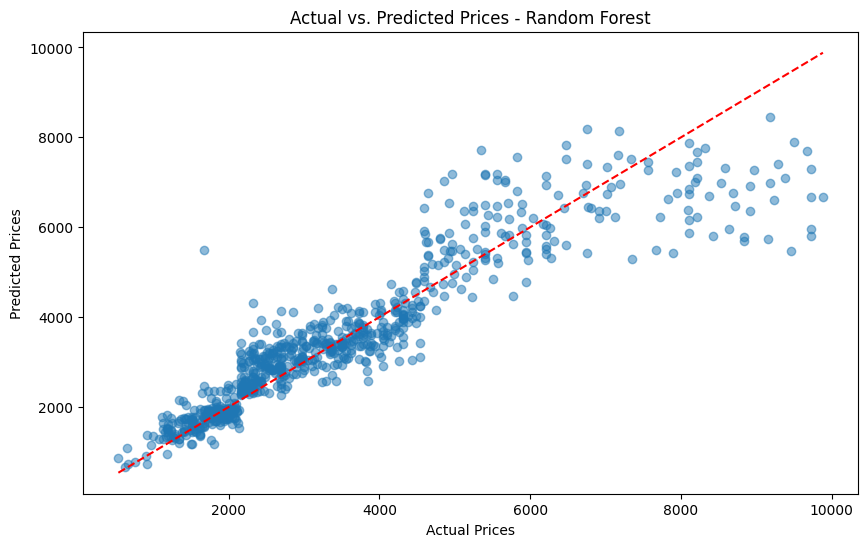

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - Random Forest')
plt.show()

#### Residual Plot

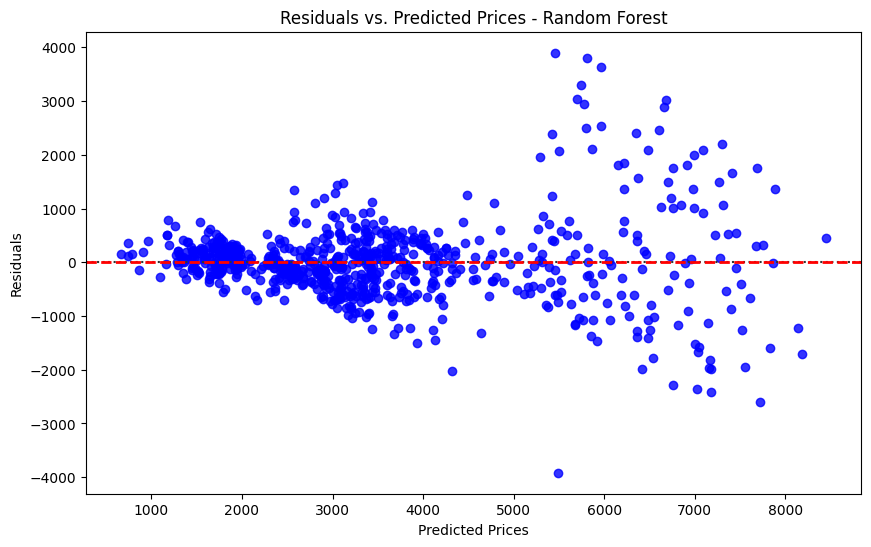

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - Random Forest')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.show()

### XGBoost

In [ ]:

# Antrenarea modelului
xgb_model = xgb.XGBRegressor(
    n_estimators=50, 
    max_depth=5, 
    min_child_weight=10, 
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictia pretului
y_pred = xgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calcularea erorilor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3f}")

r2 = xgb_model.score(X_test, y_test)
print(f"R Squared: {r2:.3f}")


threshold_percentage = 0.05  # 10%

# Calculate the number of correct predictions
correct_predictions = np.abs(y_test - y_pred) <= (threshold_percentage * np.abs(y_test))

# Calculate the percentage of correct predictions
correct_percentage = np.mean(correct_predictions) * 100

print(f"Percentage of Correct Predictions (within {threshold_percentage * 100:.0f}%): {correct_percentage:.2f}%")

MSE: 522114.971
MAE: 487.865
MAPE: 0.139
R Squared: 0.860
Percentage of Correct Predictions (within 5%): 21.77%


#### GridSearch

In [ ]:
# xgb_model = xgb.XGBRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_child_weight': [1, 2, 4, 5, 10],  
#     'learning_rate': [0.01, 0.1, 0.2], 
#     'subsample': [0.6, 0.8, 1.0],  
#     'colsample_bytree': [0.6, 0.8, 1.0]  
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
#                            scoring='neg_mean_absolute_error', cv=5, 
#                            n_jobs=-1, error_score='raise')

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best MAE:", -grid_search.best_score_)

#### Scatter Plot Valori Prezise vs Valori Corecte

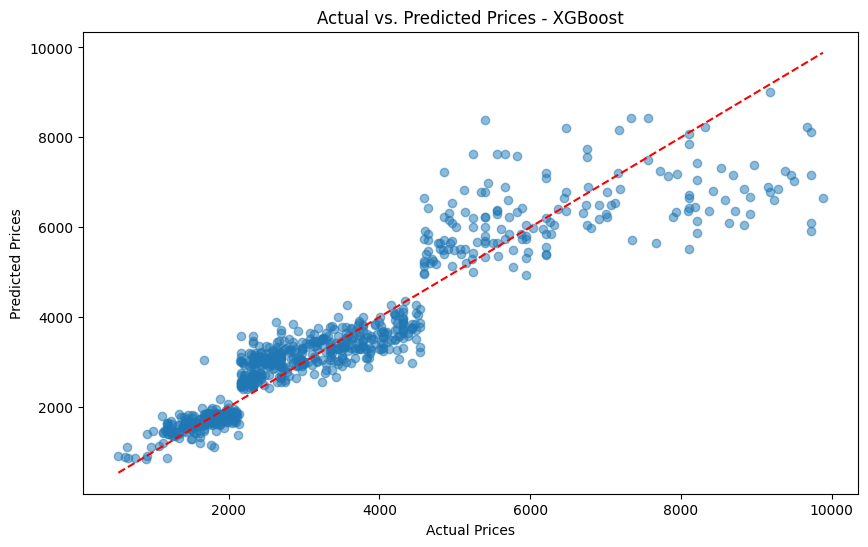

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - XGBoost')
plt.show()

#### Residual Plot

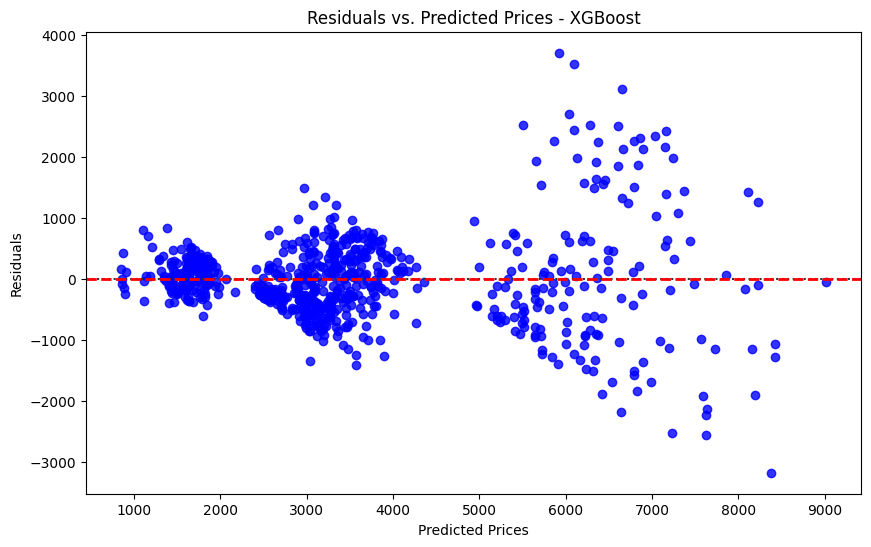

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - XGBoost')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.show()

## Cross Validation

In [ ]:

# # models = {
# #     "Linear Regression": lr_model,
# #     "Decision Tree": dtr_model,
# #     "Random Forest": rf_model,
# #     "XGBoost": xgb_model
# # }

# # # Initialize lists to store metrics
# # model_names = []
# # mean_maes = []
# # correct_percentages = []
# # # Define the threshold percentage
# # threshold_percentage = 0.10  # 10%
# # target_range = y.max() - y.min()
# # target_mean = y.mean()

# # # Evaluate each model using cross-validation
# # for model_name, model in models.items():
# #     cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
# #     cv_scores_mae = -cv_scores_mae  # Convert to positive MAE

# #     mean_mae = cv_scores_mae.mean()
# #     std_mae = cv_scores_mae.std()

# #     # Calculate MAE as a percentage of the target range and mean
# #     mae_percentage_range = (mean_mae / target_range) * 100
# #     mae_percentage_mean = (mean_mae / target_mean) * 100

# #     # Fit the model on the entire training set and make predictions on the test set
# #     model.fit(X_train, y_train)
# #     y_pred = model.predict(X_test)
# #     # Calculate the number of correct predictions
# #     correct_predictions = np.abs(y_test - y_pred) <= (threshold_percentage * np.abs(y_test))
# #     # Calculate the percentage of correct predictions
# #     correct_percentage = np.mean(correct_predictions) * 100

# #     # Store the metrics
# #     model_names.append(model_name)
# #     mean_maes.append(mean_mae)
# #     correct_percentages.append(correct_percentage)

# #     print(f"{model_name} Cross-Validation MAE: {cv_scores_mae}")
# #     print(f"Mean Cross-Validation MAE for {model_name}: {mean_mae:.3f}")
# #     print(f"Standard Deviation of Cross-Validation MAE for {model_name}: {std_mae:.3f}")
# #     print(f"Mean MAE as Percentage of Target Range for {model_name}: {mae_percentage_range:.2f}%")
# #     print(f"Mean MAE as Percentage of Target Mean for {model_name}: {mae_percentage_mean:.2f}%")
# #     print(f"Percentage of Correct Predictions (within {threshold_percentage * 100:.0f}%): {correct_percentage:.2f}%")
# #     print()



# models = {
#     "Linear Regression": lr_model,
#     "Decision Tree": dtr_model,
#     "Random Forest": rf_model,
#     "XGBoost": xgb_model
# }

# # Initialize lists to store metrics
# model_names = []
# mean_maes = []
# correct_percentages_train = []
# correct_percentages_test = []
# # Define the threshold percentage
# threshold_percentage = 0.05  # 10%
# target_range = y.max() - y.min()
# target_mean = y.mean()

# # Evaluate each model using cross-validation
# for model_name, model in models.items():
#     cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#     cv_scores_mae = -cv_scores_mae  # Convert to positive MAE

#     mean_mae = cv_scores_mae.mean()
#     std_mae = cv_scores_mae.std()

#     # Calculate MAE as a percentage of the target range and mean
#     mae_percentage_range = (mean_mae / target_range) * 100
#     mae_percentage_mean = (mean_mae / target_mean) * 100

#     # Fit the model on the entire training set and make predictions on the test set
#     model.fit(X_train, y_train)
#     y_pred_train = model.predict(X_train)  # Predictions on training set
#     y_pred_test = model.predict(X_test)    # Predictions on test set

#     # Calculate the number of correct predictions for training set
#     correct_predictions_train = np.abs(y_train - y_pred_train) <= (threshold_percentage * np.abs(y_train))
#     correct_percentage_train = np.mean(correct_predictions_train) * 100

#     # Calculate the number of correct predictions for test set
#     correct_predictions_test = np.abs(y_test - y_pred_test) <= (threshold_percentage * np.abs(y_test))
#     correct_percentage_test = np.mean(correct_predictions_test) * 100

#     # Store the metrics
#     model_names.append(model_name)
#     mean_maes.append(mean_mae)
#     correct_percentages_train.append(correct_percentage_train)
#     correct_percentages_test.append(correct_percentage_test)

#     print(f"{model_name} Cross-Validation MAE: {cv_scores_mae}")
#     print(f"Mean Cross-Validation MAE for {model_name}: {mean_mae:.3f}")
#     print(f"Standard Deviation of Cross-Validation MAE for {model_name}: {std_mae:.3f}")
#     print(f"Mean MAE as Percentage of Target Range for {model_name}: {mae_percentage_range:.2f}%")
#     print(f"Mean MAE as Percentage of Target Mean for {model_name}: {mae_percentage_mean:.2f}%")
#     print(f"Percentage of Correct Predictions on Training Set (within {threshold_percentage * 100:.0f}%): {correct_percentage_train:.2f}%")
#     print(f"Percentage of Correct Predictions on Test Set (within {threshold_percentage * 100:.0f}%): {correct_percentage_test:.2f}%")
#     print()



# f1


from sklearn.metrics import f1_score

models = {
    "Linear Regression": lr_model,
    "Decision Tree": dtr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Initialize lists to store metrics
model_names = []
mean_maes = []
correct_percentages_train = []
correct_percentages_test = []
f1_scores_train = []
f1_scores_test = []

# Define the threshold percentage
threshold_percentage = 0.05  # 5%
target_range = y.max() - y.min()
target_mean = y.mean()

# Evaluate each model using cross-validation
for model_name, model in models.items():
    cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_scores_mae = -cv_scores_mae  # Convert to positive MAE

    mean_mae = cv_scores_mae.mean()
    std_mae = cv_scores_mae.std()

    # Calculate MAE as a percentage of the target range and mean
    mae_percentage_range = (mean_mae / target_range) * 100
    mae_percentage_mean = (mean_mae / target_mean) * 100

    # Fit the model on the entire training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)  # Predictions on training set
    y_pred_test = model.predict(X_test)    # Predictions on test set

    # Calculate the number of correct predictions for training set
    correct_predictions_train = np.abs(y_train - y_pred_train) <= (threshold_percentage * np.abs(y_train))
    correct_percentage_train = np.mean(correct_predictions_train) * 100

    # Calculate the number of correct predictions for test set
    correct_predictions_test = np.abs(y_test - y_pred_test) <= (threshold_percentage * np.abs(y_test))
    correct_percentage_test = np.mean(correct_predictions_test) * 100

    # Convert correct predictions to binary format for F1 score calculation
    y_train_binary = correct_predictions_train.astype(int)
    y_test_binary = correct_predictions_test.astype(int)

    # Calculate F1 scores
    f1_train = f1_score(y_train_binary, y_train_binary)  # F1 score for training set
    f1_test = f1_score(y_test_binary, y_test_binary)      # F1 score for test set

    # Store the metrics
    model_names.append(model_name)
    mean_maes.append(mean_mae)
    correct_percentages_train.append(correct_percentage_train)
    correct_percentages_test.append(correct_percentage_test)
    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

    print(f"{model_name} Cross-Validation MAE: {cv_scores_mae}")
    print(f"Mean Cross-Validation MAE for {model_name}: {mean_mae:.3f}")
    print(f"Standard Deviation of Cross-Validation MAE for {model_name}: {std_mae:.3f}")
    print(f"Mean MAE as Percentage of Target Range for {model_name}: {mae_percentage_range:.2f}%")
    print(f"Mean MAE as Percentage of Target Mean for {model_name}: {mae_percentage_mean:.2f}%")
    print(f"Percentage of Correct Predictions on Training Set (within {threshold_percentage * 100:.0f}%): {correct_percentage_train:.2f}%")
    print(f"Percentage of Correct Predictions on Test Set (within {threshold_percentage * 100:.0f}%): {correct_percentage_test:.2f}%")
    print(f"F1 Score on Training Set: {f1_train:.3f}")
    print(f"F1 Score on Test Set: {f1_test:.3f}")
    print()


Linear Regression Cross-Validation MAE: [476.57558824 496.74869171 498.52223684 505.09989651 476.05748952]
Mean Cross-Validation MAE for Linear Regression: 490.601
Standard Deviation of Cross-Validation MAE for Linear Regression: 11.992
Mean MAE as Percentage of Target Range for Linear Regression: 5.13%
Mean MAE as Percentage of Target Mean for Linear Regression: 13.99%
Percentage of Correct Predictions on Training Set (within 5%): 24.98%
Percentage of Correct Predictions on Test Set (within 5%): 22.56%
F1 Score on Training Set: 1.000
F1 Score on Test Set: 1.000

Decision Tree Cross-Validation MAE: [498.13638051 482.23399085 503.14907965 515.40671966 484.30442643]
Mean Cross-Validation MAE for Decision Tree: 496.646
Standard Deviation of Cross-Validation MAE for Decision Tree: 12.300
Mean MAE as Percentage of Target Range for Decision Tree: 5.20%
Mean MAE as Percentage of Target Mean for Decision Tree: 14.16%
Percentage of Correct Predictions on Training Set (within 5%): 25.91%
Percent

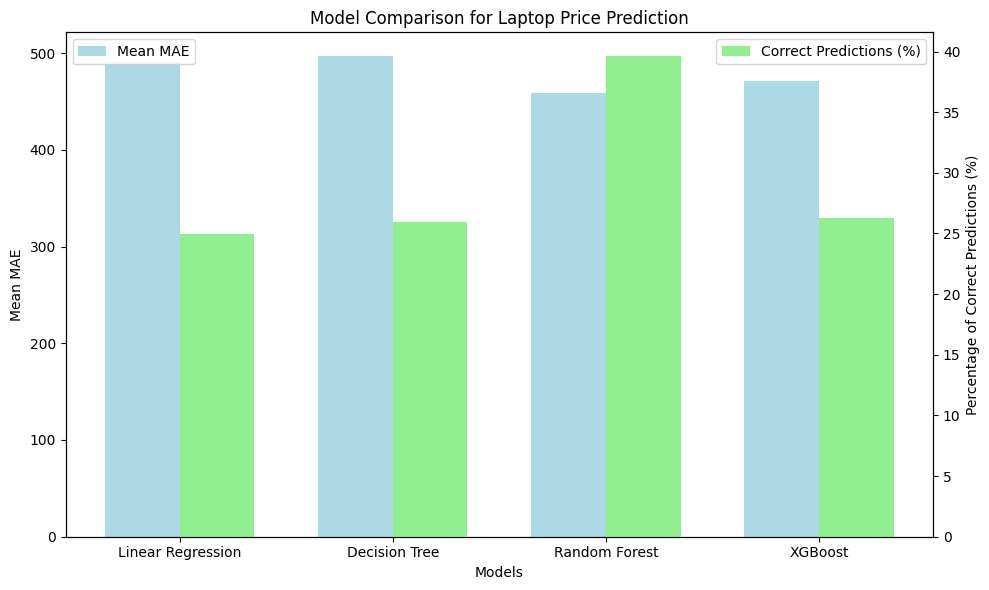

In [ ]:
# Create a bar chart to compare the models
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create a bar chart for Mean MAE
bars1 = ax1.bar(x - width/2, mean_maes, width, label='Mean MAE', color='lightblue')
# Create a second y-axis to plot the percentage of correct predictions
ax2 = ax1.twinx()  
bars2 = ax2.bar(x + width/2, correct_percentages_train, width, label='Correct Predictions (%)', color='lightgreen')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean MAE')
ax2.set_ylabel('Percentage of Correct Predictions (%)')
ax1.set_title('Model Comparison for Laptop Price Prediction')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()

## Learning Curve

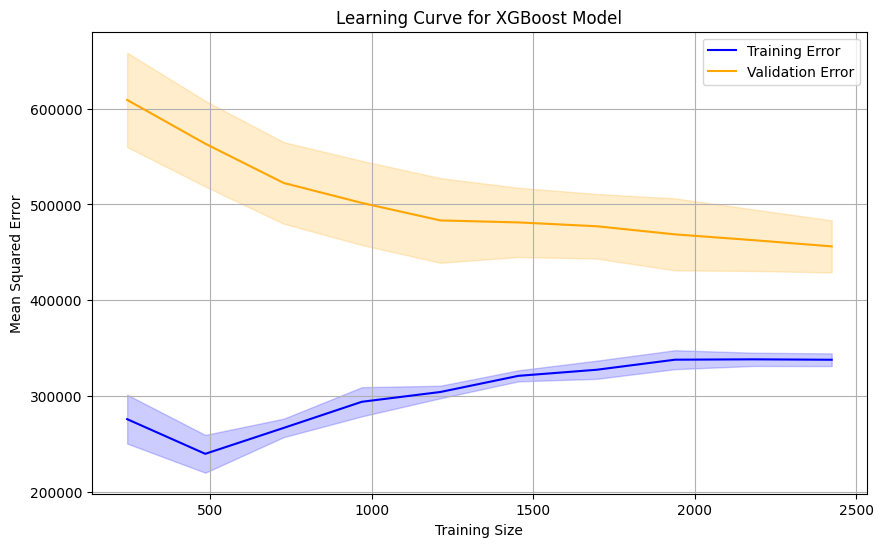

In [ ]:
from sklearn.model_selection import learning_curve
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    scoring='neg_mean_squared_error',  # You can change this to other metrics if needed
    n_jobs=-1
)
# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)  # Negate to get positive MSE
test_scores_mean = -np.mean(test_scores, axis=1)    # Negate to get positive MSE
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='orange')
# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 color='blue', alpha=0.2)
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 color='orange', alpha=0.2)
# Adding labels and title
plt.title('Learning Curve for XGBoost Model')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

## SHAP (SHapley Additive exPlanations)
Contributia fiecarei coloane la predictia modelului.

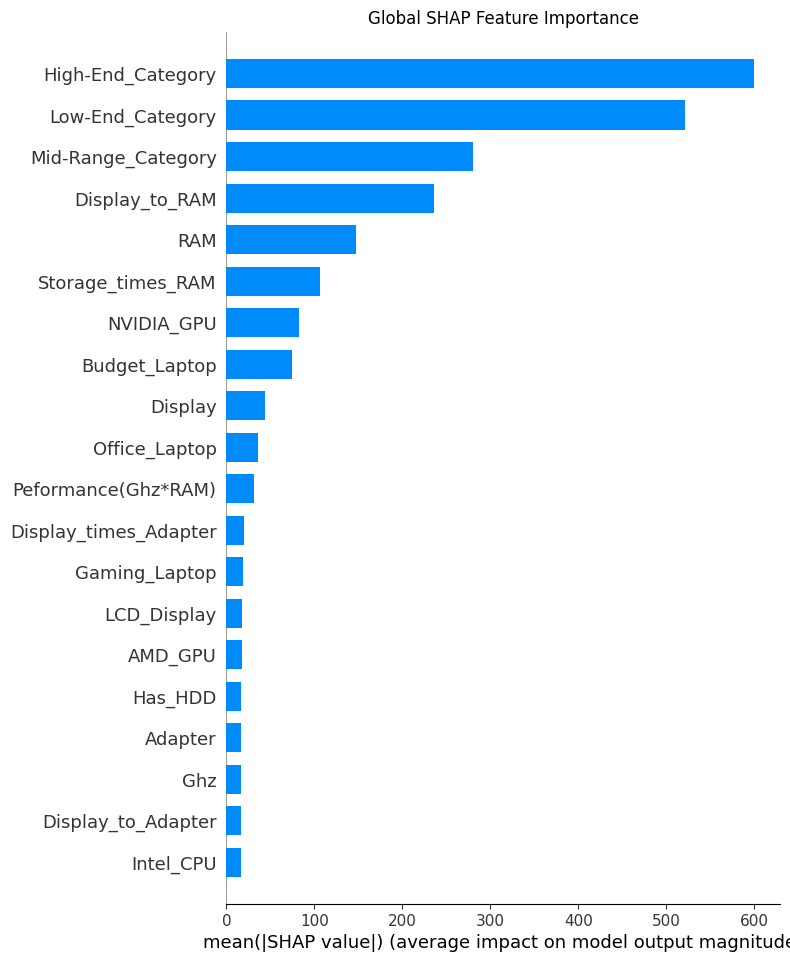

In [ ]:

import shap
# SHAP Explanation
# Initialize the SHAP explainer
shap_explainer = shap.Explainer(xgb_model)
shap_values = shap_explainer(X_test)

# Global SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Global SHAP Feature Importance")
plt.show()

In [ ]:
df.Display.unique()

array([11.6, 15.6, 14. , 16. , 17.3, 13.3, 16.1, 13.6, 14.2, 14.1, 15.3,
       13.4, 15. , 10.5, 13.5, 13. , 12.4, 16.2, 17. , 18. , 14.5, 12. ,
       10.1, 14.9, 11. , 12.3, 16.6, 12.2, 12.5, 15.4])

In [ ]:
count_above_1000 = ((df['Price'] > 10000) ).sum()
print("Number of records above 1000 price:", count_above_1000)

Number of records above 1000 price: 153


### Partial Dependency Plot (PDP) 
Relatia dintre pret si caracteristici.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = [ 'RAM', 'Ghz', 'Display', 'Adapter', 'Storage', 'Price_per_Display', 'High-End_Category', 'Low-End_Category']

missing_features = [f for f in features if f not in X_train.columns]
if missing_features:
    raise ValueError(f"The following features are missing from X_train: {missing_features}")

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    display = PartialDependenceDisplay.from_estimator(
        xgb_model,
        X_train,
        features=[feature],
        ax=axes[i],
        grid_resolution=50
    )
    axes[i].set_title(f'Partial Dependence: {feature}')
plt.tight_layout()
plt.show()

ValueError: The following features are missing from X_train: ['Price_per_Display']

## Individual Conditional Expectation (ICE)

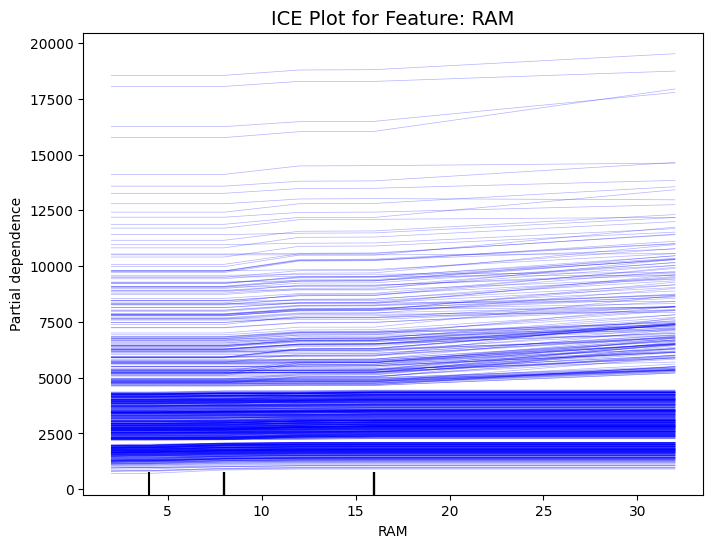

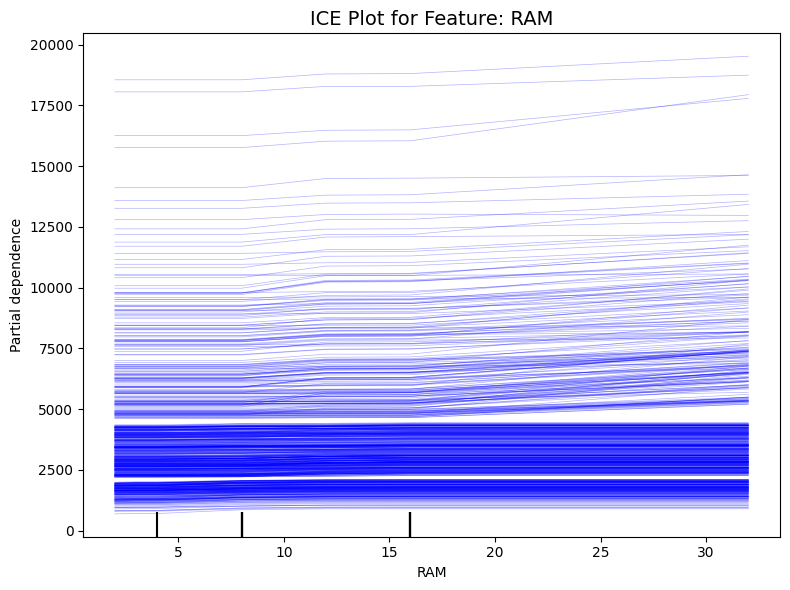

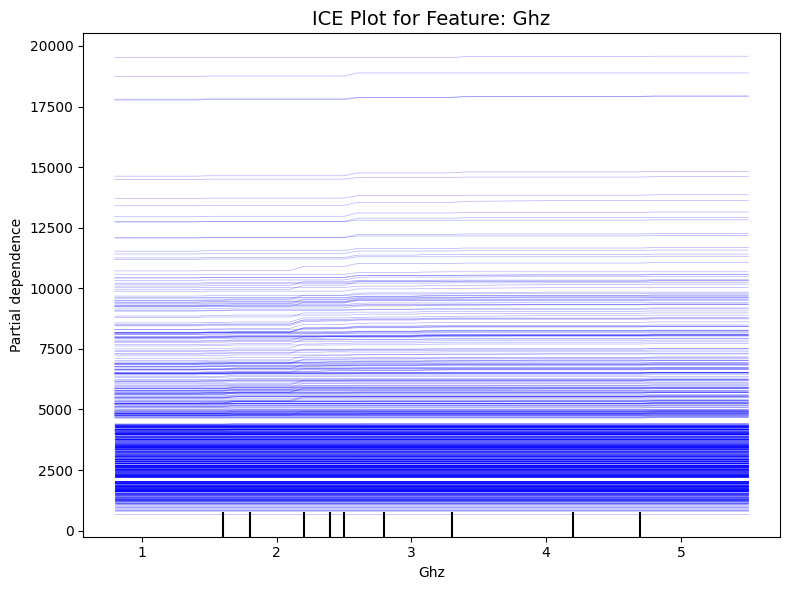

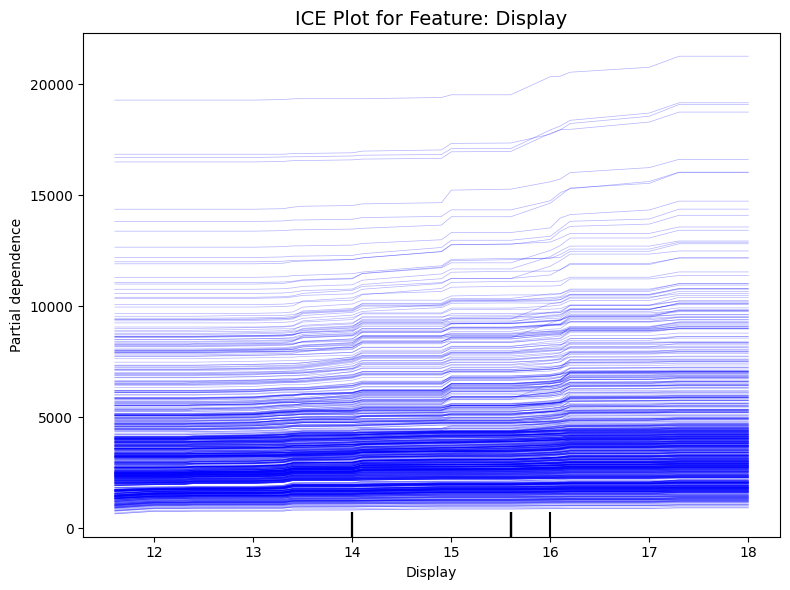

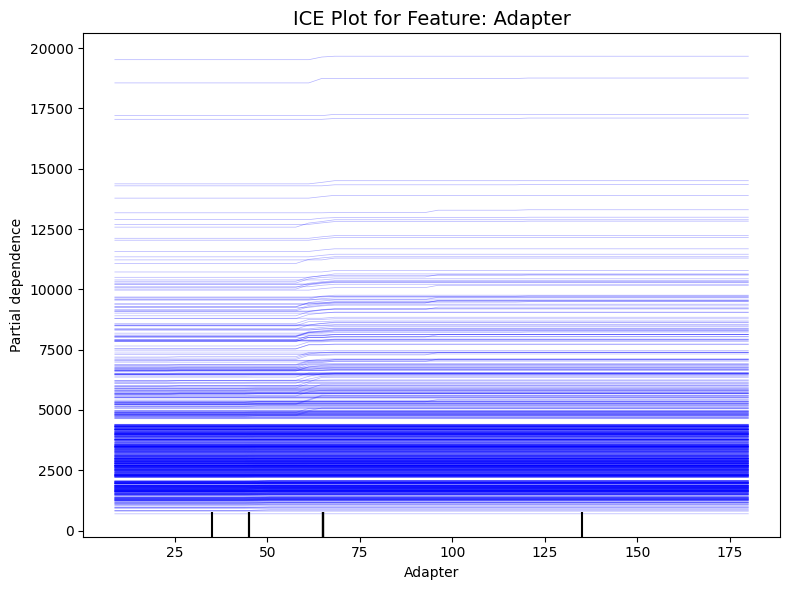

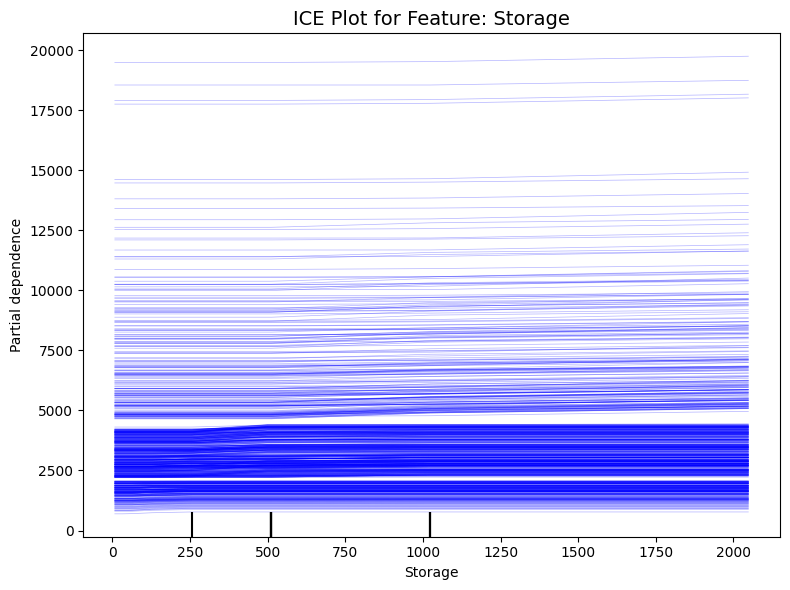

Feature 'Storage_times_RAM' not found in the dataset columns.
Feature 'Display_times_RAM' not found in the dataset columns.


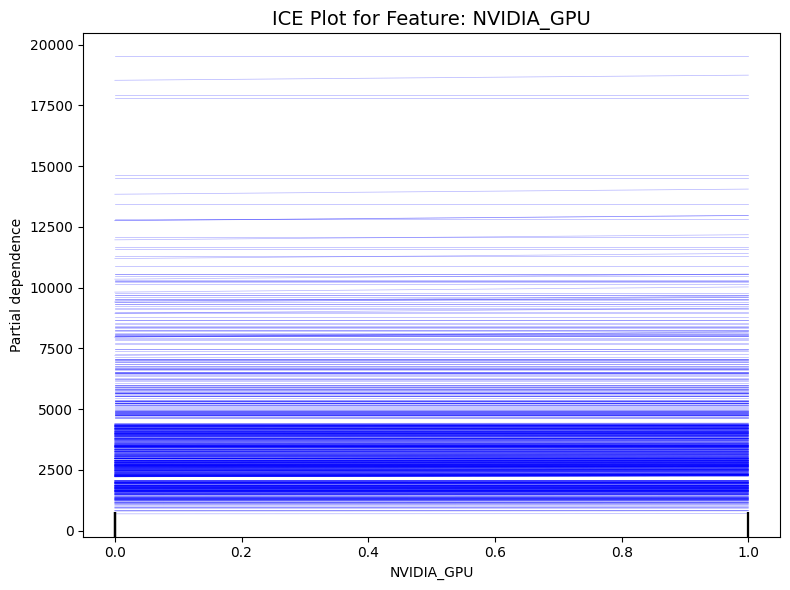

In [ ]:
from pdpbox import pdp

# Create ICE plot for a specific feature
feature_name = 'RAM'  # Replace with the name of the feature you want to analyze
# Check if the feature exists in the dataset
if feature_name not in X.columns:
    raise ValueError(f"Feature '{feature_name}' not found in the dataset columns.")
# Create the ICE plot
fig, ax = plt.subplots(figsize=(8, 6))
display = PartialDependenceDisplay.from_estimator(
    xgb_model, 
    X_test, 
    features=[feature_name],     
    kind='individual',   # individual ICE lines
    ax=ax,
    grid_resolution=50,
    line_kw={'alpha':0.3, 'color':'blue'}
)
ax.set_title(f'ICE Plot for Feature: {feature_name}', fontsize=14)



xgb_model.fit(X_train, y_train)
# List of features for which to create ICE plots
features = ['RAM', 'Ghz', 'Display', 'Adapter', 'Storage', 'Storage_times_RAM', 'Display_times_RAM', 'NVIDIA_GPU']
# Loop through each feature and create an ICE plot
for feature_name in features:
    # Check if the feature exists in the dataset
    if feature_name not in X.columns:
        print(f"Feature '{feature_name}' not found in the dataset columns.")
        continue  # Skip to the next feature if not found
    # Create the ICE plot
    fig, ax = plt.subplots(figsize=(8, 6))
    display = PartialDependenceDisplay.from_estimator(
        xgb_model, 
        X_test, 
        features=[feature_name],     
        kind='individual',   # individual ICE lines
        ax=ax,
        grid_resolution=50,
        line_kw={'alpha': 0.3, 'color': 'blue'}
    )
    
    ax.set_title(f'ICE Plot for Feature: {feature_name}', fontsize=14)
    ax.set_ylabel('Predicted Target')
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()  # Show the plot for the current feature